# Assignment_1_MFI

#### Importing librarires

In [148]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Importing data and creating dataframes for different groups

In [149]:
data = pd.read_csv('current.csv')
data = data.set_index('sasdate')
data = data.ffill()
data = data.drop('Transform:')
group1_description = pd.read_csv('Group1.csv')
group1_header = group1_description['fred'].tolist()
group2_description = pd.read_csv('Group2.csv')
group2_header = group2_description['fred'].tolist()
group3_description = pd.read_csv('Group3.csv')
group3_header = group3_description['fred'].tolist()
group4_description = pd.read_csv('Group4.csv')
group4_header = group4_description['fred'].tolist()
group5_description = pd.read_csv('Group5.csv')
group5_header = group5_description['fred'].tolist()
group6_description = pd.read_csv('Group6.csv')
group6_header = group6_description['fred'].tolist()
group7_description = pd.read_csv('Group7.csv')
group7_header = group7_description['fred'].tolist()
group8_description = pd.read_csv('Group8.csv')
group8_header = group8_description['fred'].tolist()

valid_columns1 = [col for col in group1_header if col in data.columns]
valid_columns2 = [col for col in group2_header if col in data.columns]
valid_columns3 = [col for col in group3_header if col in data.columns]
valid_columns4 = [col for col in group4_header if col in data.columns]
valid_columns5 = [col for col in group5_header if col in data.columns]
valid_columns6 = [col for col in group6_header if col in data.columns]
valid_columns7 = [col for col in group7_header if col in data.columns]
valid_columns8 = [col for col in group8_header if col in data.columns]


group1 = data[valid_columns1]
group2 = data[valid_columns2]
group3 = data[valid_columns3]
group4 = data[valid_columns4]
group5 = data[valid_columns5]
group6 = data[valid_columns6]
group7 = data[valid_columns7]
group8 = data[valid_columns8]


Note: I have interchanged group 5 and group 6 by mistake.
Here in this code Group 5 refers to 'Interest rates and exchange rates'
group 6 refers to 'Money and Credit'

### 1.1 Creating tables per group with descriptive stats for group variables

In [150]:
#Creating a function to return the statistical parameters of columns of the group


def stats(group, header):
    # Initialize an empty DataFrame to store the statistics
    parameter_table = pd.DataFrame(columns=['Column', 'Mean', 'P25', 'P50', 'P75', 'Std Dev', 'Min', 'Max'])
    
    for col_name in header:
        data = group[col_name]
        mean = data.mean()
        p25 = data.quantile(0.25)
        p50 = data.median()
        p75 = data.quantile(0.75)
        std_dev = data.std()
        min_val = data.min()
        max_val = data.max()
        
           # Create a temporary DataFrame with the statistics for the current column
        temp_df = pd.DataFrame({'Column': [col_name], 'Mean': [mean], 'P25': [p25], 'P50': [p50], 'P75': [p75], 'Std Dev': [std_dev], 'Min': [min_val], 'Max': [max_val]})
        
        # Concatenate the temporary DataFrame with the parameter_table
        parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)
        
    return parameter_table


### 1.2 Creating correlation heatmap for variables of the group

In [151]:
#Creating a function that returns correlation heatmap for variables of the group

def correl(group, header):
    # Calculate the correlation matrix
    correlation_matrix = group[header].corr()

    # Create a heatmap
    #Chat GPT prompt: How to create a heatmap for a given matrix in python
    plt.figure(figsize=(len(header), len(header)))
    sns.set(font_scale=1.0)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

#### Group 1 stats and heatmap

In [152]:
stats(group1, valid_columns1)


C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column         Mean         P25        P50          P75      Std Dev  \
0         RPI  8855.603173  4824.21200  7791.8050  12846.14900  4630.406628   
1     W875RX1  7563.829806  4297.65000  6822.0000  10764.70000  3684.157086   
2      INDPRO    66.917970    44.60615    62.1825     93.69715    26.626474   
3     IPFPNSS    71.300824    46.92790    70.9328     99.04205    27.144376   
4     IPFINAL    70.068916    44.72795    69.2396     98.05645    27.409148   
5     IPCONGD    78.741843    61.21515    80.2983    100.27105    23.412590   
6    IPDCONGD    66.011679    41.77085    60.0560     95.84655    28.394748   
7    IPNCONGD    84.094874    67.99825    90.2068    101.65750    21.119957   
8     IPBUSEQ    52.420382    20.02910    42.2312     86.43235    33.469706   
9       IPMAT    62.157895    41.07210    53.1989     88.33000    26.842383   
10     IPDMAT    51.350734    23.31170    33.8283     87.34745    32.485065   
11     IPNMAT    86.551288    74.58345    97.6732    102.12090    23.012447   
12  IPMANSICS    66.915753    42.80705    62.1929     96.68235    27.975801   
13    IPFUELS    67.738781    58.11710    65.9494     83.09840    17.955845   
14     CUMFNS    79.344860    76.16830    79.0341     82.71230     5.027059   

          Min         Max  
0   2442.1580  21448.0630  
1   2293.2000  14754.4000  
2     21.9665    104.1181  
3     23.3891    110.2219  
4     22.2688    108.6777  
5     31.7011    111.7850  
6     17.3929    110.1288  
7     38.1501    113.9125  
8      8.0434    105.6015  
9     19.0868    106.7112  
10    10.7011    104.3391  
11    30.6591    116.0417  
12    20.7616    108.3983  
13    33.4456    103.1450  
14    62.2487     91.6379

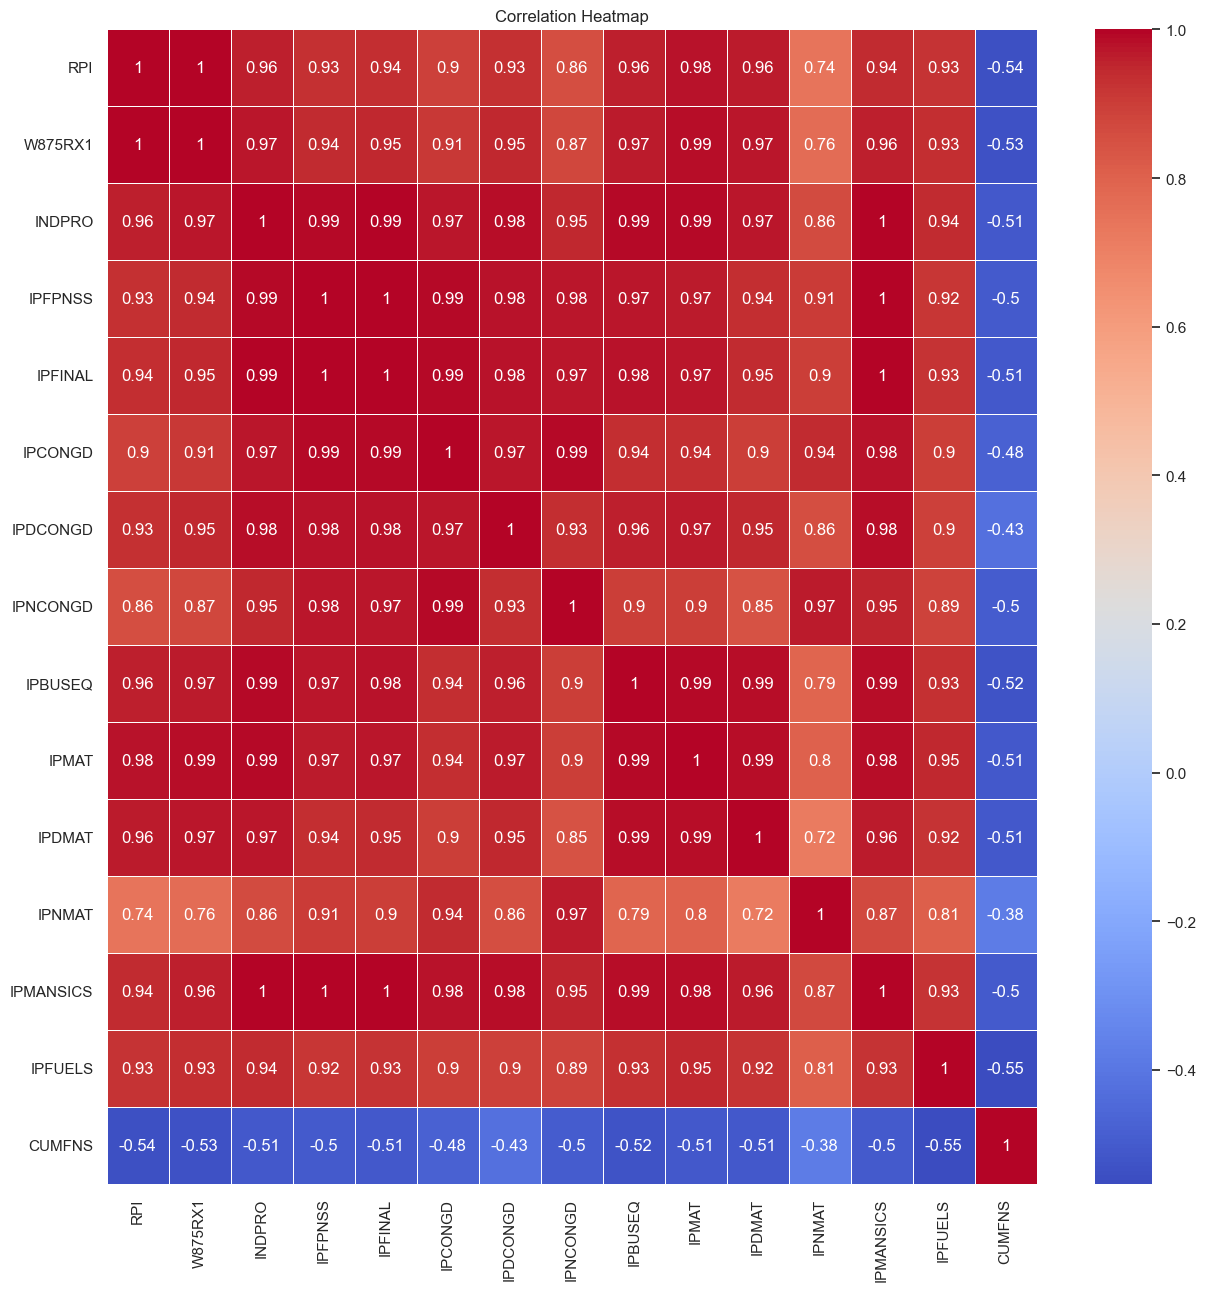

In [153]:
correl(group1, valid_columns1)

#### Group 2 stats and heatmap

In [154]:
stats(group2, valid_columns2)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column           Mean            P25            P50            P75  \
0             HWI    4113.532903    3047.000000    3882.000000    4732.000000   
1       HWIURATIO       0.640944       0.411041       0.557246       0.778013   
2         CLF16OV  121692.421935   93146.500000  126154.000000  153046.000000   
3          CE16OV  114462.464516   86645.500000  118241.000000  140207.000000   
4          UNRATE       5.923613       4.800000       5.600000       7.000000   
5        UEMPMEAN      17.385935      12.600000      15.400000      19.500000   
6         UEMPLT5    2614.023226    2212.500000    2621.000000    3043.000000   
7       UEMP5TO14    2115.363871    1641.000000    2151.000000    2525.500000   
8        UEMP15OV    2501.246452    1294.500000    2168.000000    2969.500000   
9       UEMP15T26    1036.745806     681.500000     986.000000    1260.500000   
10       UEMP27OV    1464.490323     623.500000    1164.000000    1699.000000   
11        CLAIMSx  356539.442581  282790.500000  333600.000000  391975.000000   
12         PAYEMS  106152.527742   78177.000000  108752.000000  132665.500000   
13         USGOOD   21826.814194   20227.500000   22127.000000   23376.000000   
14  CES1021000001     673.253548     586.450000     636.300000     716.250000   
15         USCONS    5202.489032    3941.000000    5096.000000    6685.500000   
16         MANEMP   15878.454194   13920.000000   16862.000000   17723.500000   
17        DMANEMP    9733.490323    8700.000000   10161.000000   10877.500000   
18       NDMANEMP    6144.963871    5082.000000    6648.000000    6914.500000   
19         SRVPRD   84325.713548   55449.000000   85945.000000  112817.000000   
20          USTPU   20865.072258   15652.000000   22307.000000   25681.500000   
21       USWTRADE    4753.881806    3799.050000    5143.500000    5682.200000   
22        USTRADE   11856.055613    8577.300000   12964.800000   15048.000000   
23         USFIRE    6095.041290    4035.500000    6583.000000    7938.500000   
24         USGOVT   17544.655484   14750.500000   18556.000000   21854.000000   
25  CES0600000007      40.293935      39.900000      40.300000      40.800000   
26        AWOTMAN       3.744258       3.200000       3.800000       4.300000   
27         AWHMAN      40.780129      40.400000      40.700000      41.300000   
28  CES0600000008      12.349213       5.005000      11.720000      18.665000   
29  CES2000000008      14.341123       6.660000      13.630000      20.930000   
30  CES3000000008      11.408219       4.605000      11.050000      17.260000   

          Std Dev            Min           Max  
0     1796.577182    1357.000000  1.202700e+04  
1        0.334042       0.152866  2.013898e+00  
2    31186.722698   67649.000000  1.669510e+05  
3    29489.397071   63684.000000  1.610310e+05  
4        1.678130       3.400000  1.470000e+01  
5        7.336958       7.100000  4.070000e+01  
6      730.006421    1431.000000  1.423200e+04  
7      902.982405     653.000000  1.480600e+04  
8     1828.097354     339.000000  9.130000e+03  
9      597.862777     191.000000  6.580000e+03  
10    1340.613617     115.000000  6.800000e+03  
11  215661.895397  176263.000000  4.663250e+06  
12   30668.571341   52478.000000  1.562040e+05  
13    1901.140557   17628.000000  2.516300e+04  
14     135.874027     493.300000  1.177400e+03  
15    1486.459964    2862.000000  7.947000e+03  
16    2344.596910   11414.000000  1.955300e+04  
17    1405.408525    6985.000000  1.232000e+04  
18     975.955658    4348.000000  7.233000e+03  
19   30829.023908   33682.000000  1.346260e+05  
20    5554.187336   10774.000000  2.889500e+04  
21    1089.266713    2568.700000  6.050600e+03  
22    3492.447260    5350.300000  1.587680e+04  
23    2093.647562    2418.000000  9.144000e+03  
24    4438.384957    8105.000000  2.299600e+04  
25       0.644317      37.200000  4.160000e+01  
26       0.717006       2.000000  5.200000e+00  
27       0.732235      37.300000  4.230000e+01

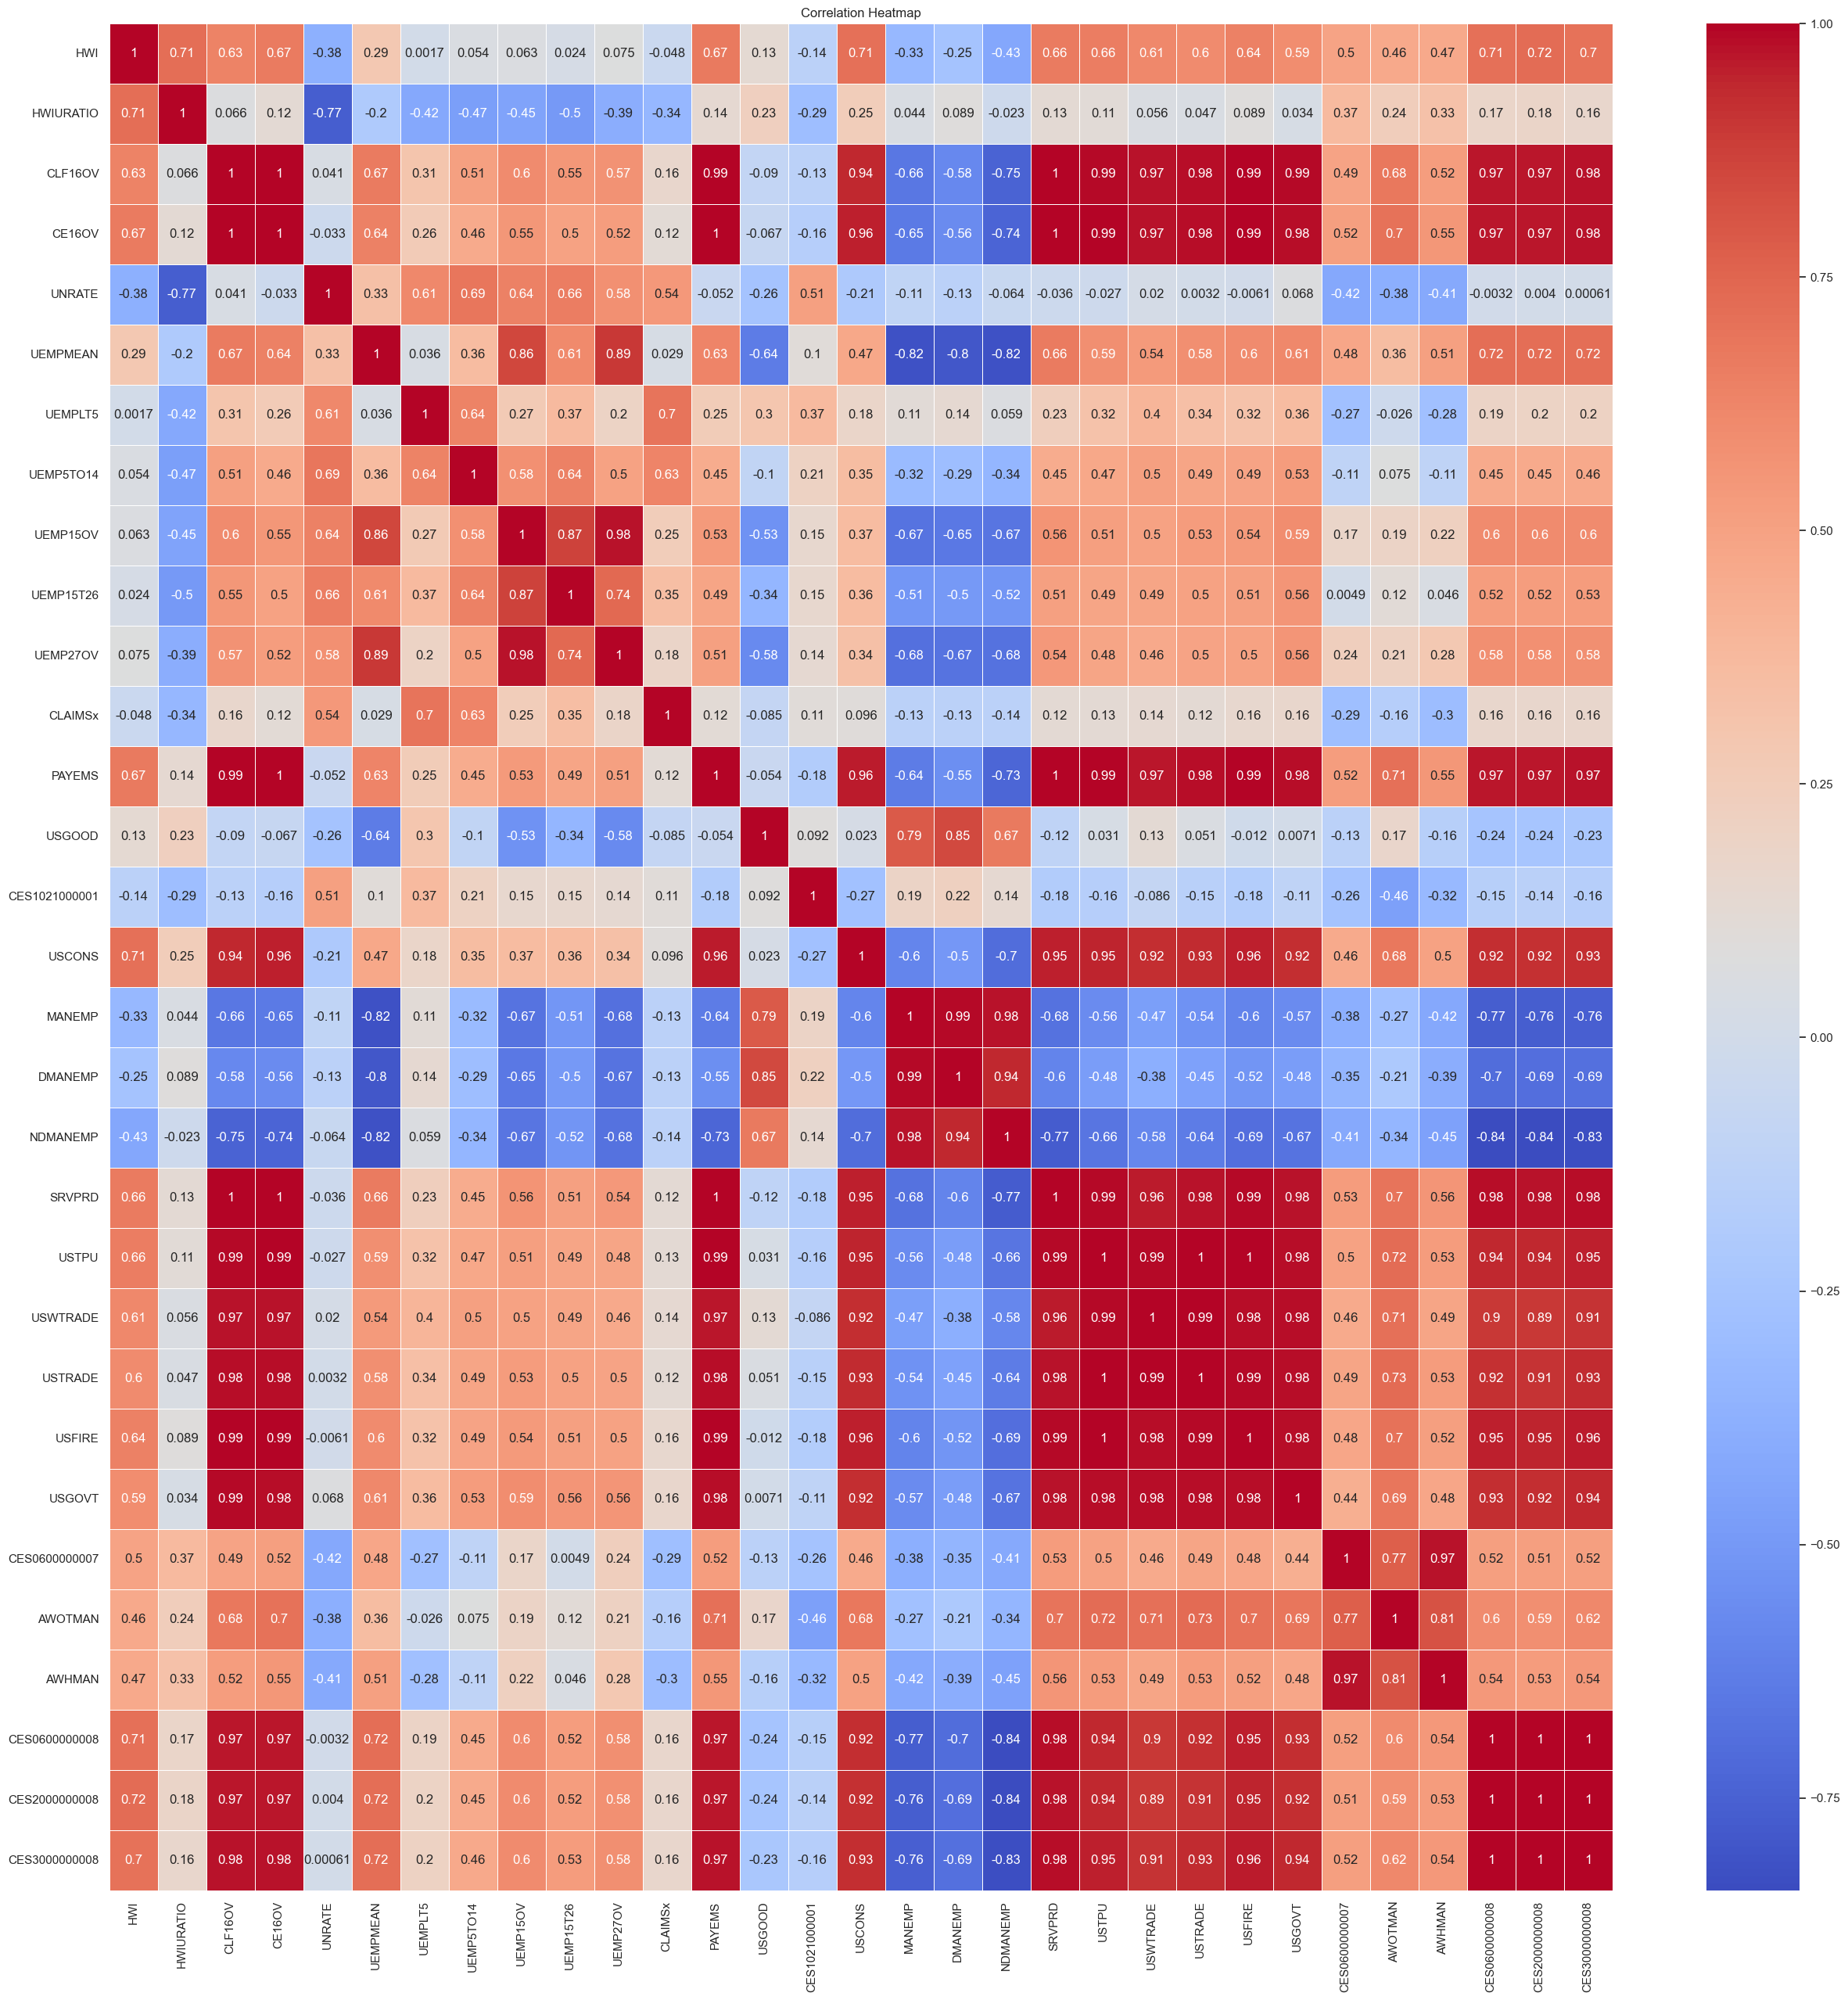

In [155]:
correl(group2, valid_columns2)

#### Group 3 stats and heatmap

In [156]:
stats(group3, valid_columns3)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column         Mean     P25     P50     P75     Std Dev    Min     Max
0     HOUST  1433.372903  1200.0  1459.0  1652.5  383.667170  478.0  2494.0
1   HOUSTNE   171.095484   123.0   157.0   219.5   67.660031   36.0   395.0
2   HOUSTMW   276.118710   203.0   283.0   345.5   98.906026   59.0   590.0
3    HOUSTS   640.428387   513.5   624.0   768.5  181.746486  230.0  1187.0
4    HOUSTW   345.738065   272.5   346.0   420.0  109.460126   79.0   645.0
5    PERMIT  1348.905806  1095.0  1344.0  1645.5  413.920083    4.0  2419.0
6  PERMITNE   169.299355   124.0   161.0   211.0   66.292716    4.0   426.0
7  PERMITMW   254.496774   191.0   253.0   318.0   90.907325    4.0   507.0
8   PERMITS   579.028387   417.5   571.0   728.5  210.517270    4.0  1104.0
9   PERMITW   346.268387   272.0   346.0   420.0  120.185592    4.0   759.0

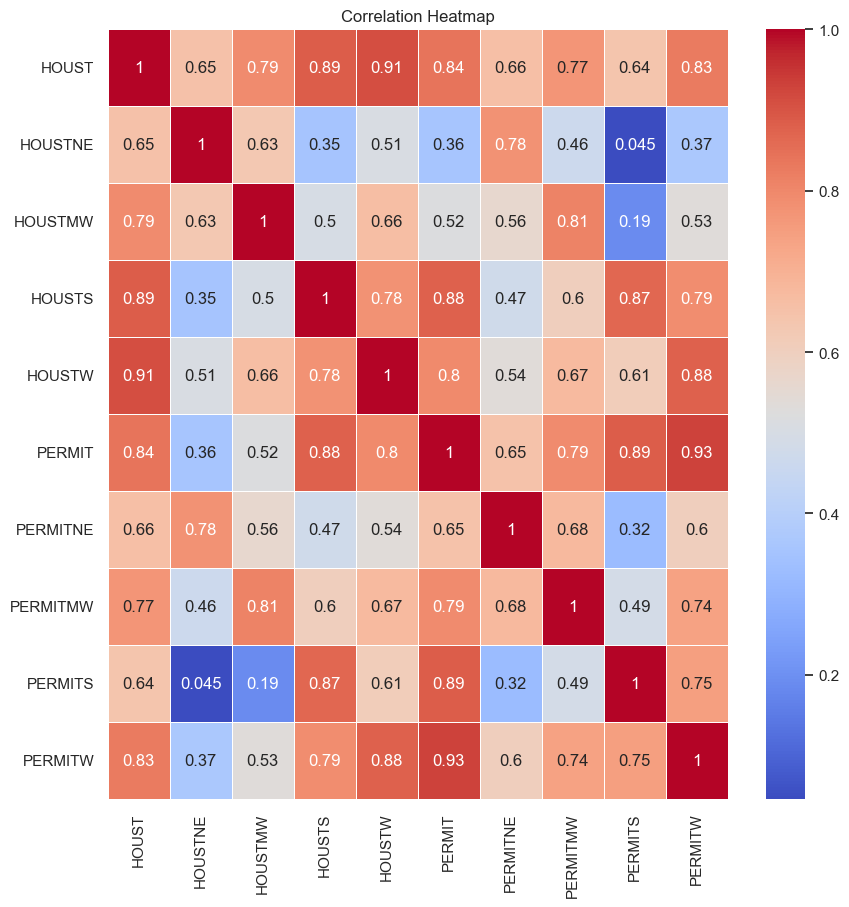

In [157]:
correl(group3, valid_columns3)

#### Group 4 stats and heatmap

In [158]:
stats(group4, valid_columns4)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column           Mean            P25            P50          P75  \
0  DPCERA3M086SBEA      62.720459      32.534500      54.695000       95.124   
1        CMRMTSPLx  856518.713242  513385.924500  756723.986000  1227190.000   
2          RETAILx  212901.867370   48686.290900  161028.220500   353316.500   
3           ACOGNO   78247.792258       5.000000       5.000000   164186.500   
4          AMDMNOx  126139.081987   42644.599845  119982.553500   196434.000   
5          ANDENOx   39606.360231   12636.004165   38806.000000    63981.500   
6          AMDMUOx  497999.254429  156909.830550  438224.000000   831105.000   
7          BUSINVx  894586.099806  277615.355450  810883.304000  1365545.000   
8         ISRATIOx       1.471785       1.380000       1.487682        1.560   
9         UMCSENTx      85.672774      76.550000      89.800000       95.300   

         Std Dev           Min           Max  
0      33.302191      17.27200  1.308780e+02  
1  398566.835256  280932.40120  1.585920e+06  
2  177757.065363   18235.77392  6.925010e+05  
3   85859.946751       5.00000  2.623840e+05  
4   80807.447249   13253.95781  3.024890e+05  
5   28151.729613       5.00000  1.368280e+05  
6  383155.960637   39379.34956  1.325307e+06  
7  655121.062629   84889.55898  2.545835e+06  
8       0.121324       1.24000  1.756291e+00  
9      13.967913       2.00000  1.120000e+02

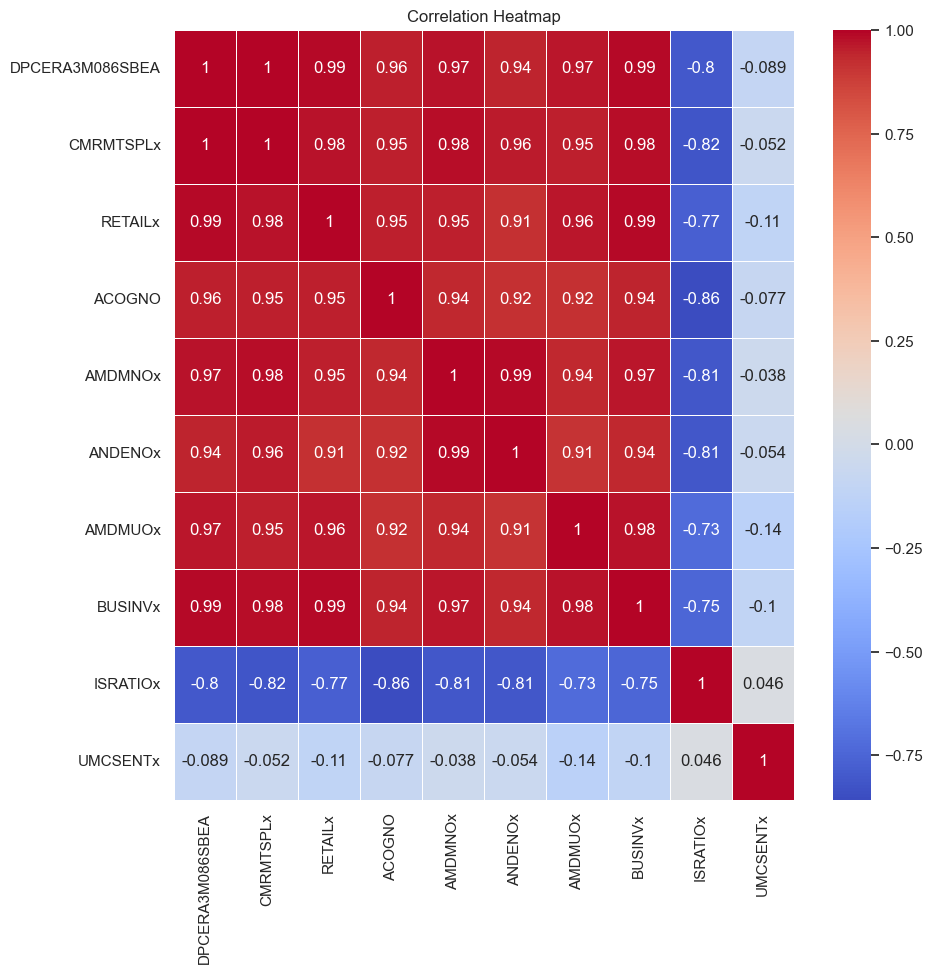

In [159]:
correl(group4, valid_columns4)

#### Group 5 stats and heatmap

In [160]:
stats(group5, valid_columns5)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column        Mean        P25       P50        P75     Std Dev  \
0    FEDFUNDS    4.767432    1.92000    4.6300    6.53500    3.659700   
1       CP3Mx    4.892065    2.33500    4.8800    6.58500    3.448954   
2       TB3MS    4.347535    1.92500    4.4400    5.96000    3.155893   
3       TB6MS    4.487755    2.05000    4.6000    6.14000    3.145621   
4         GS1    4.843690    2.33500    4.8900    6.64500    3.357457   
5         GS5    5.486594    3.32500    5.1900    7.40500    3.123390   
6        GS10    5.801690    3.84500    5.3900    7.52500    2.935951   
7         AAA    6.802774    4.45000    6.6300    8.44500    2.703901   
8         BAA    7.805123    5.24000    7.5400    9.35500    2.931527   
9   COMPAPFFx    0.123858   -0.01000    0.1000    0.32000    0.430305   
10   TB3SMFFM   -0.419523   -0.60000   -0.1900   -0.04000    0.698926   
11   TB6SMFFM   -0.279303   -0.50000   -0.0500    0.09000    0.756721   
12     T1YFFM    0.076632   -0.10000    0.1400    0.45000    0.759833   
13     T5YFFM    0.719497    0.11500    0.8600    1.58000    1.322992   
14    T10YFFM    1.034606    0.20000    1.1900    2.17000    1.590041   
15     AAAFFM    2.035703    0.98000    2.1700    3.36000    1.893667   
16     BAAFFM    3.038065    1.82000    3.1100    4.48000    1.990866   
17    EXSZUSx    2.107132    1.16350    1.5372    2.69430    1.245208   
18    EXJPUSx  194.635196  110.04665  133.8890  291.54440  102.062151   
19    EXUSUKx    1.880137    1.52720    1.6897    2.34525    0.494952   
20    EXCAUSx    1.194604    1.07280    1.1797    1.32275    0.161713   

        Min       Max  
0    0.0500   19.1000  
1    0.0900   18.0700  
2    0.0100   16.3000  
3    0.0400   15.5200  
4    0.0500   16.7200  
5    0.2700   15.9300  
6    0.6200   15.3200  
7    2.1400   15.4900  
8    3.1600   17.1800  
9   -2.7800    2.2200  
10  -5.3700    1.0700  
11  -5.0100    1.2800  
12  -5.0000    1.7500  
13  -6.3100    3.1600  
14  -6.5100    3.8500  
15  -6.2700    5.7300  
16  -4.0500    8.8200  
17   0.7800    4.3490  
18  76.6430  362.9764  
19   1.0931    2.8165  
20   0.9478    1.5997

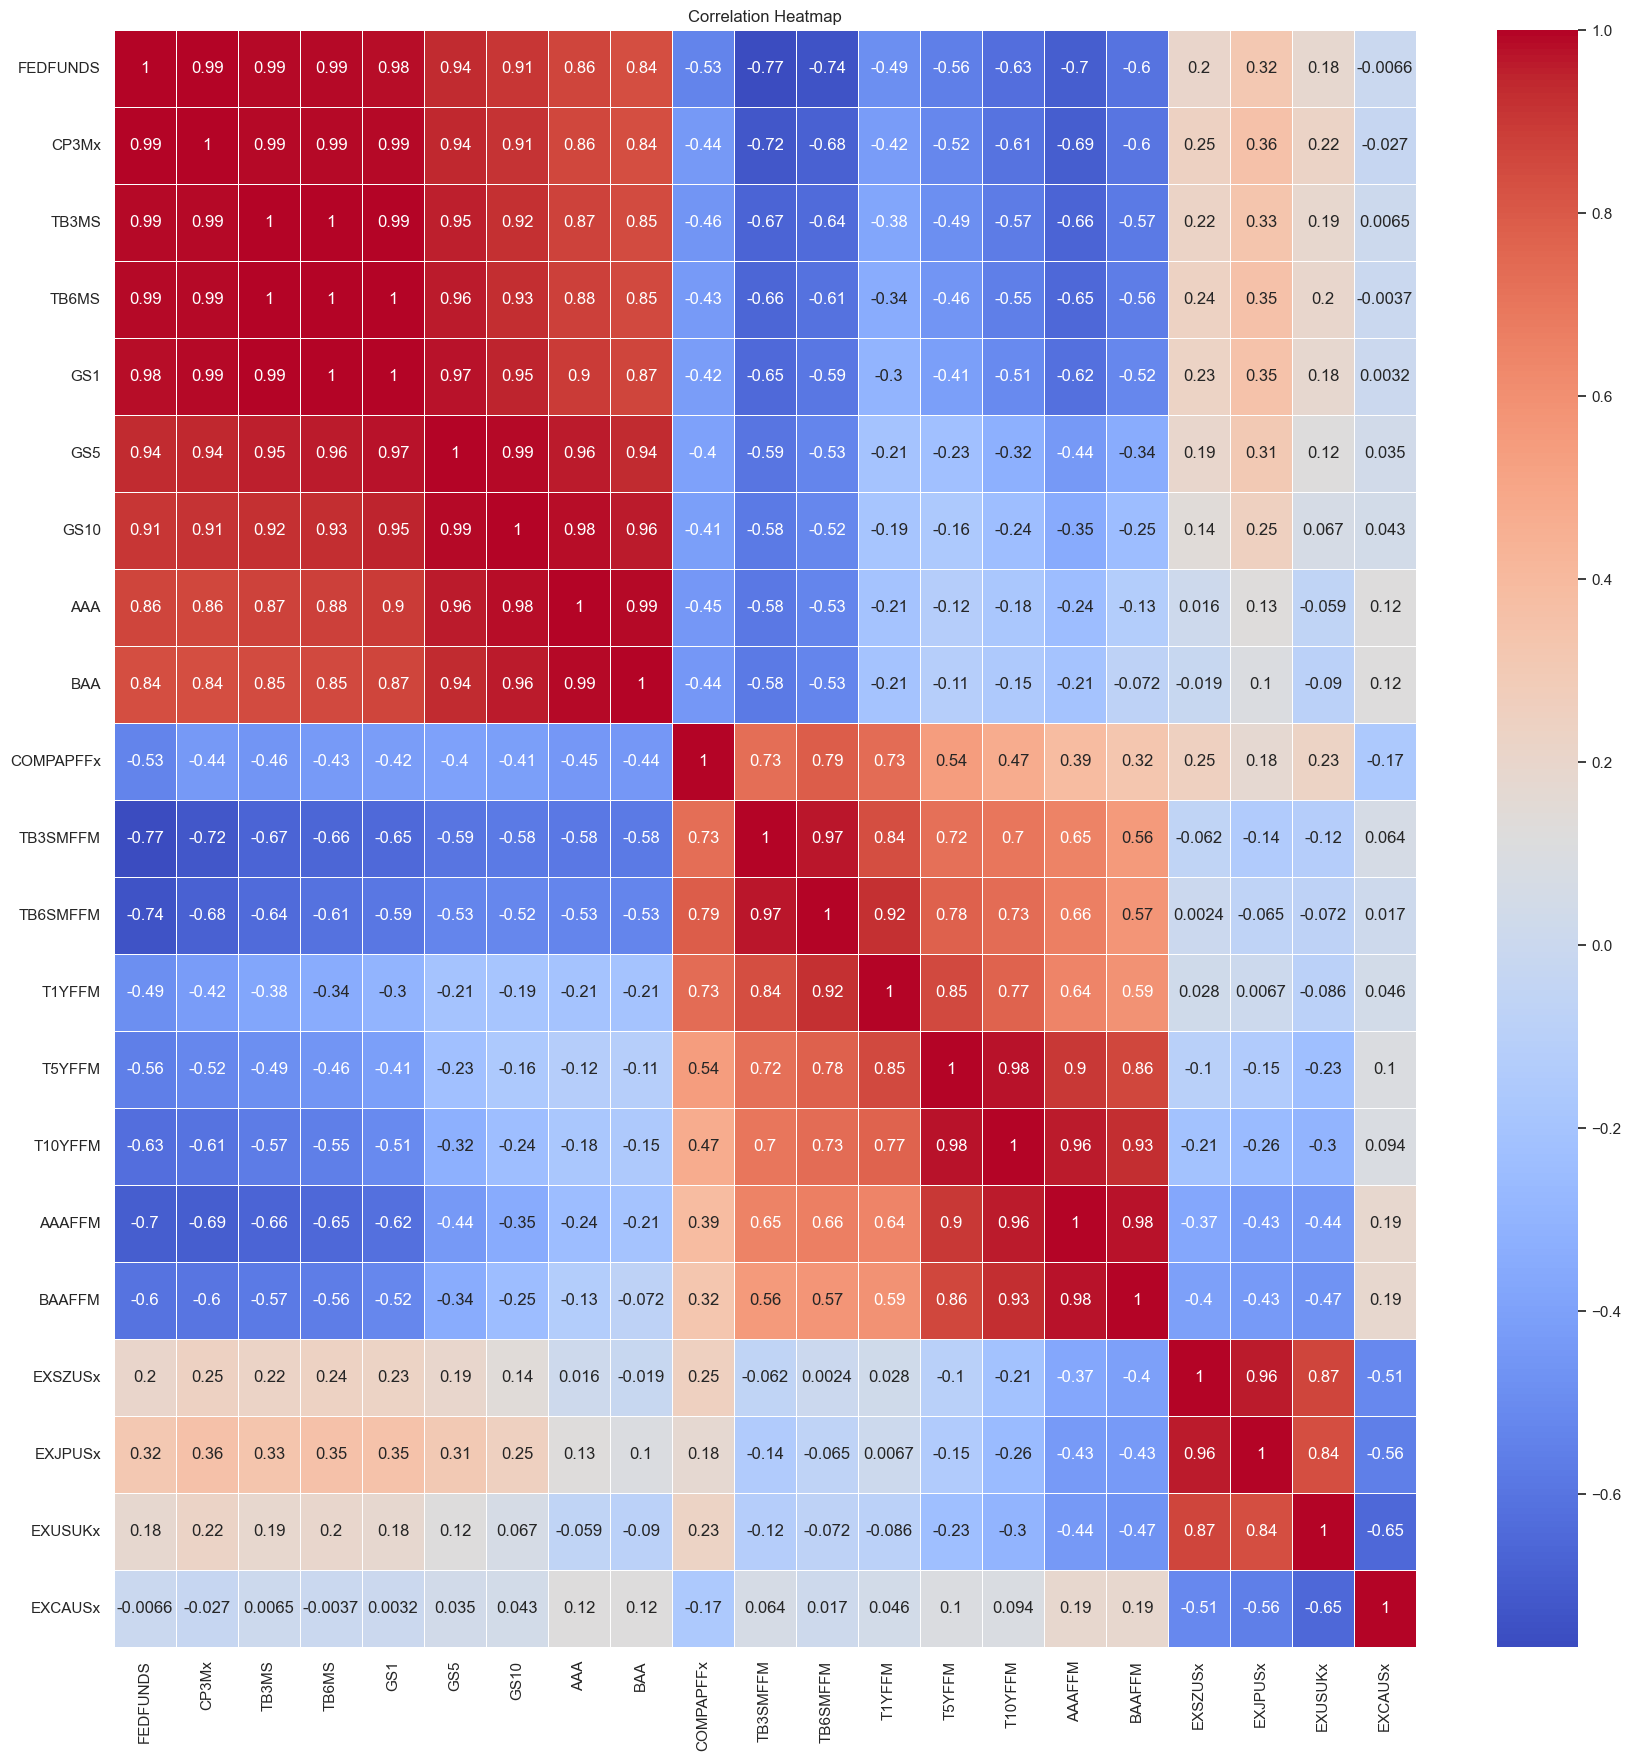

In [161]:
correl(group5, valid_columns5)

#### Group 6 stats and heatmap

In [162]:
stats(group6, valid_columns6)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column           Mean           P25            P50            P75  \
0          M1SL    1957.155742    275.600000     843.100000    1378.500000   
1          M2SL    5086.390194    919.550000    3332.400000    7262.000000   
2        M2REAL    2901.215226   1843.150000    2416.300000    3512.150000   
3      TOTRESNS     539.982581     34.650000      44.000000      61.950000   
4     NONBORRES  523054.709677  33450.000000   42900.000000   60350.000000   
5      BUSLOANS     813.131774    182.241350     607.376800    1189.583900   
6        REALLN    1535.493501    130.905200     860.635500    3425.064650   
7      NONREVSL     978.589156    185.659220     549.959410    1562.292985   
8        CONSPI       0.134767      0.123219       0.134066       0.149976   
9   DTCOLNVHFNM  128027.944310  10749.500000   78829.000000  262764.255000   
10     DTCTHFNM  336670.993832  33835.500000  187414.380000  724938.640000   
11       INVEST    1253.833766    174.714150     643.854300    2030.062000   

          Std Dev            Min           Max  
0     4079.436230     138.900000  2.066420e+04  
1     5344.040759     286.600000  2.170360e+04  
2     1587.054530     987.900000  7.671800e+03  
3     1005.565097      18.000000  4.193200e+03  
4   994176.354307 -333500.000000  4.149900e+06  
5      746.816557      35.130400  3.035875e+03  
6     1648.369760      24.924200  5.454967e+03  
7      991.945200      48.961160  3.612659e+03  
8        0.018419       0.092865  1.658864e-01  
9   124147.111520    6476.000000  3.953937e+05  
10  323191.263649   12298.000000  8.969851e+05  
11    1389.455646      71.186400  5.836412e+03

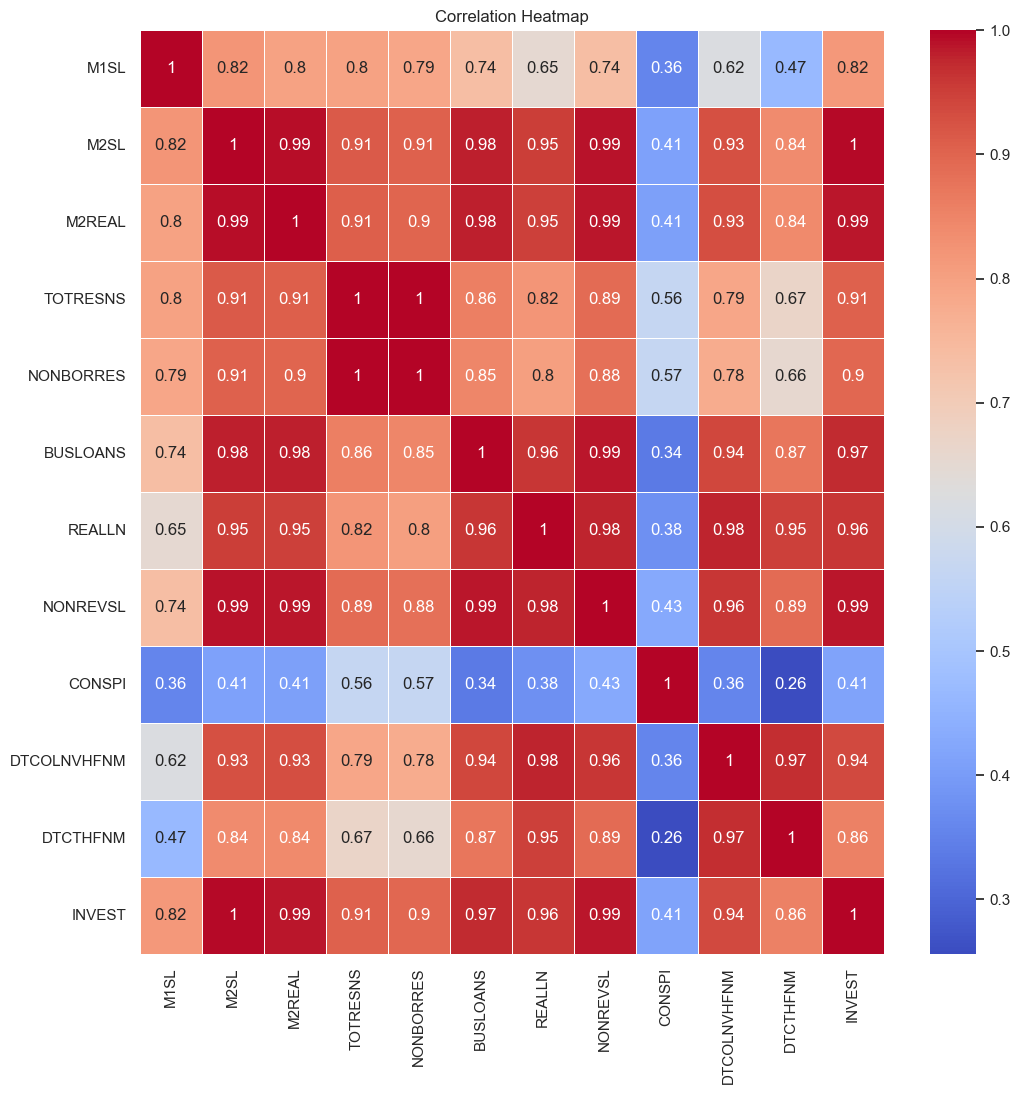

In [163]:
correl(group6, valid_columns6)

#### Group 7 stats and heatmap

In [164]:
stats(group7, valid_columns7)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column        Mean      P25      P50       P75     Std Dev  \
0         OILPRICEx   32.146635  11.1600   21.355   47.5200   29.241149   
1            PPICMM  124.484145  71.1500  111.800  175.2500   69.390045   
2          CPIAUCSL  135.100210  52.7000  135.100  206.9945   80.511118   
3          CPIAPPSL  100.808139  72.0500  118.600  126.0510   31.088529   
4          CPITRNSL  121.259743  48.5000  123.900  181.6500   68.121013   
5          CPIMEDSL  209.101437  46.0500  174.300  349.0020  167.608926   
6       CUSR0000SAC  115.850319  57.0000  126.300  166.2990   57.035488   
7       CUSR0000SAS  153.836401  46.9500  144.900  246.2705  104.908828   
8          CPIULFSL  134.911330  51.3500  134.900  207.8205   80.384862   
9     CUSR0000SA0L5  131.403924  53.1000  132.900  199.8005   76.323514   
10            PCEPI   62.024434  27.8420   64.878   91.4355   33.101309   
11  DDURRG3M086SBEA   98.534237  76.1540  100.310  121.5600   26.799465   
12  DNDGRG3M086SBEA   60.298329  31.5310   65.006   86.5560   29.499447   
13  DSERRG3M086SBEA   58.364937  21.0355   56.285   90.4995   36.785220   

       Min      Max  
0    2.920  133.930  
1   32.200  322.100  
2   28.970  303.841  
3   44.700  135.100  
4   29.300  278.378  
5   21.100  555.962  
6   33.200  225.277  
7   22.900  383.072  
8   28.900  301.025  
9   29.600  292.077  
10  16.042  127.178  
11  56.570  140.457  
12  17.777  115.940  
13  11.326  136.989

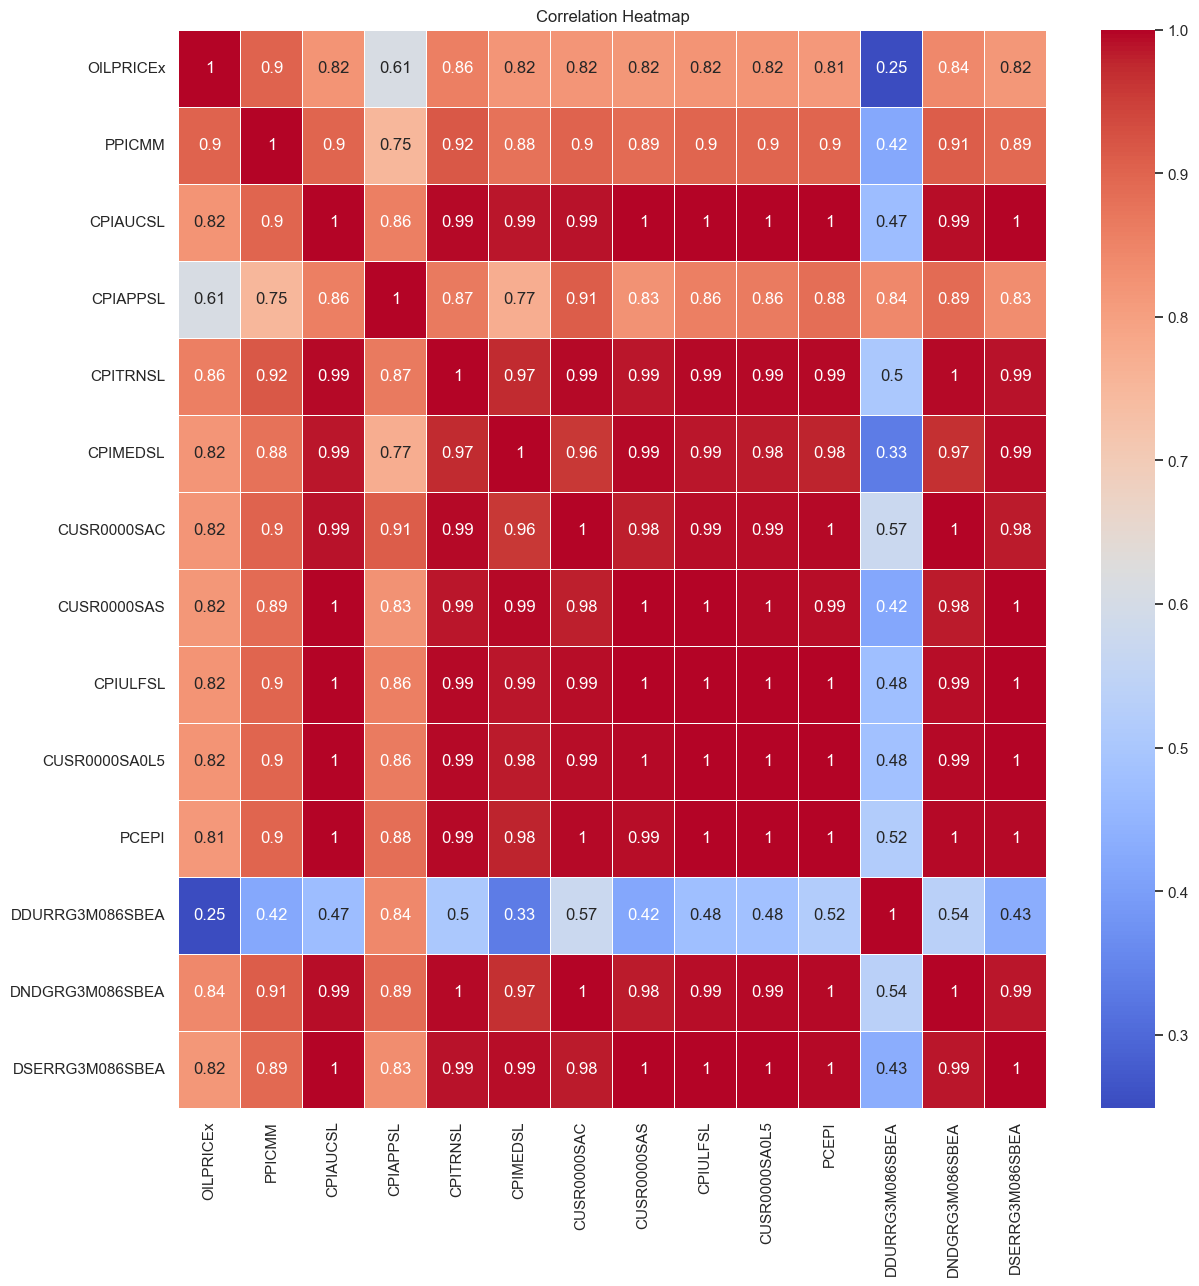

In [165]:
correl(group7, valid_columns7)

#### Group 8 stats and heatmap

In [166]:
stats(group8, valid_columns8)

C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\2885078397.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameter_table = pd.concat([parameter_table, temp_df], ignore_index=True)


Column         Mean         P25         P50          P75  \
0        S&P 500   864.524684  100.550000  377.990000  1284.885000   
1    S&P: indust  1110.195613  110.850000  450.050000  1566.340000   
2  S&P div yield     2.860351    1.903459    2.900066     3.463389   
3   S&P PE ratio    19.311696   14.799061   18.641002    22.158893   

       Std Dev        Min          Max  
0  1039.486717  53.730000  4674.770000  
1  1433.544127  56.900000  6561.930000  
2     1.128131   1.108074     6.237048  
3     8.372949   6.569558    86.843117

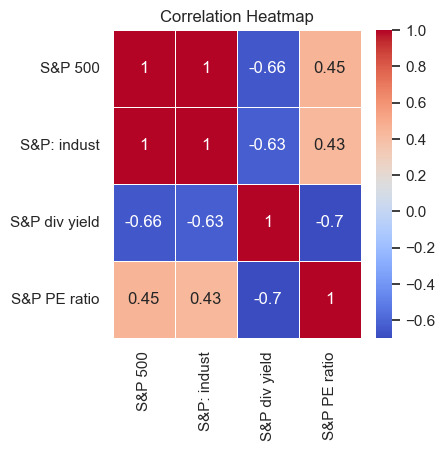

In [167]:
correl(group8, valid_columns8)

### 1.3 Patterns from 1.1 and 1.2

•	Group1: Production index and Capacity utilization is negatively correlated across industries could be because of industry cycle and a lag effect between production and capacity

•	Group4: Inventory to sales ratio is negatively correlated to inventories, orders and consumption indicating increasing supply chain efficiency

•	Group5: Correlation is observed between rates, spreads and FX rates

•	Group5: Standard Deviation of M1SL is higher as compared to M2SL as M1 money supply contains liquid components which tend to fluctuate more

•	Group8: Stock prices are negatively correlated to dividend yields


### 2. Creating Subgroups for group 5, 6 and 8

In [168]:
subgroup5_1_header = valid_columns5[0:9]

subgroup5_2_header = valid_columns5[9:17]

subgroup5_3_header = valid_columns5[17:21]
subgroup5_3_1header = [valid_columns5[17], valid_columns5[19], valid_columns5[20]]
subgroup5_3_2header = valid_columns5[18:19] #3.1 and 3.2 are seperated due to difference in scale

subgroup6_1_header = valid_columns6[0:3]

subgroup6_2_header = valid_columns6[3:5]
subgroup6_2_1header = valid_columns6[3:4]
subgroup6_2_2header = valid_columns6[4:5] #seperated due to difference in scale

subgroup6_3_header = valid_columns6[5:9]
subgroup6_3_1header = valid_columns6[5:8]
subgroup6_3_2header = valid_columns6[8:9] #seperated due to difference in scale

subgroup6_4_header = valid_columns6[9:12]
subgroup6_4_1header = valid_columns6[9:11]
subgroup6_4_2header = valid_columns6[11:12] #seperated due to difference in scale

subgroup8_1_header = valid_columns8[0:2]

subgroup8_2_header = valid_columns8[2:3]

subgroup8_3_header = valid_columns8[3:4]

#print(subgroup5_1_header)
#print(subgroup5_2_header)
#print(subgroup6_3_1header)
#print(subgroup6_1_header)
#print(subgroup6_2_header)
#print(subgroup6_3_header)
#print(subgroup6_4_header)
#print(subgroup8_1_header)
#print(subgroup8_2_header)
#print(subgroup8_3_header)


In [169]:
subgroup5_1 = group5[subgroup5_1_header]
subgroup5_2 = group5[subgroup5_2_header]
subgroup5_3 = group5[subgroup5_3_header]

subgroup6_1 = group6[subgroup6_1_header]
subgroup6_2 = group6[subgroup6_2_header]
subgroup6_3 = group6[subgroup6_3_header]
subgroup6_4 = group6[subgroup6_4_header]

subgroup8_1 = group8[subgroup8_1_header]
subgroup8_2 = group8[subgroup8_2_header]
subgroup8_3 = group8[subgroup8_3_header]

print(subgroup5_1.head())

          FEDFUNDS  CP3Mx  TB3MS  TB6MS   GS1   GS5  GS10   AAA   BAA
sasdate                                                              
1/1/1959      2.48   3.30   2.82   3.09  3.36  4.01  4.02  4.12  4.87
2/1/1959      2.43   3.26   2.70   3.13  3.54  3.96  3.96  4.14  4.89
3/1/1959      2.80   3.35   2.80   3.13  3.61  3.99  3.99  4.13  4.85
4/1/1959      2.96   3.42   2.95   3.27  3.72  4.12  4.12  4.23  4.86
5/1/1959      2.90   3.56   2.84   3.33  3.96  4.35  4.31  4.37  4.96


### 2.2 Plots of Subgroup over time


In [170]:
# Creating function to plot data over time
def plot_time(group):
    group.index = pd.to_datetime(group.index) #Used Chat GPT's help to add this line, was getting error otherwise
    plt.figure(figsize=(15, 10))
    for column_name in group.columns:
        plt.plot(group.index, group[column_name], label=column_name)
        plt.title('Plot over time')  
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Subgroup 5.1 plot

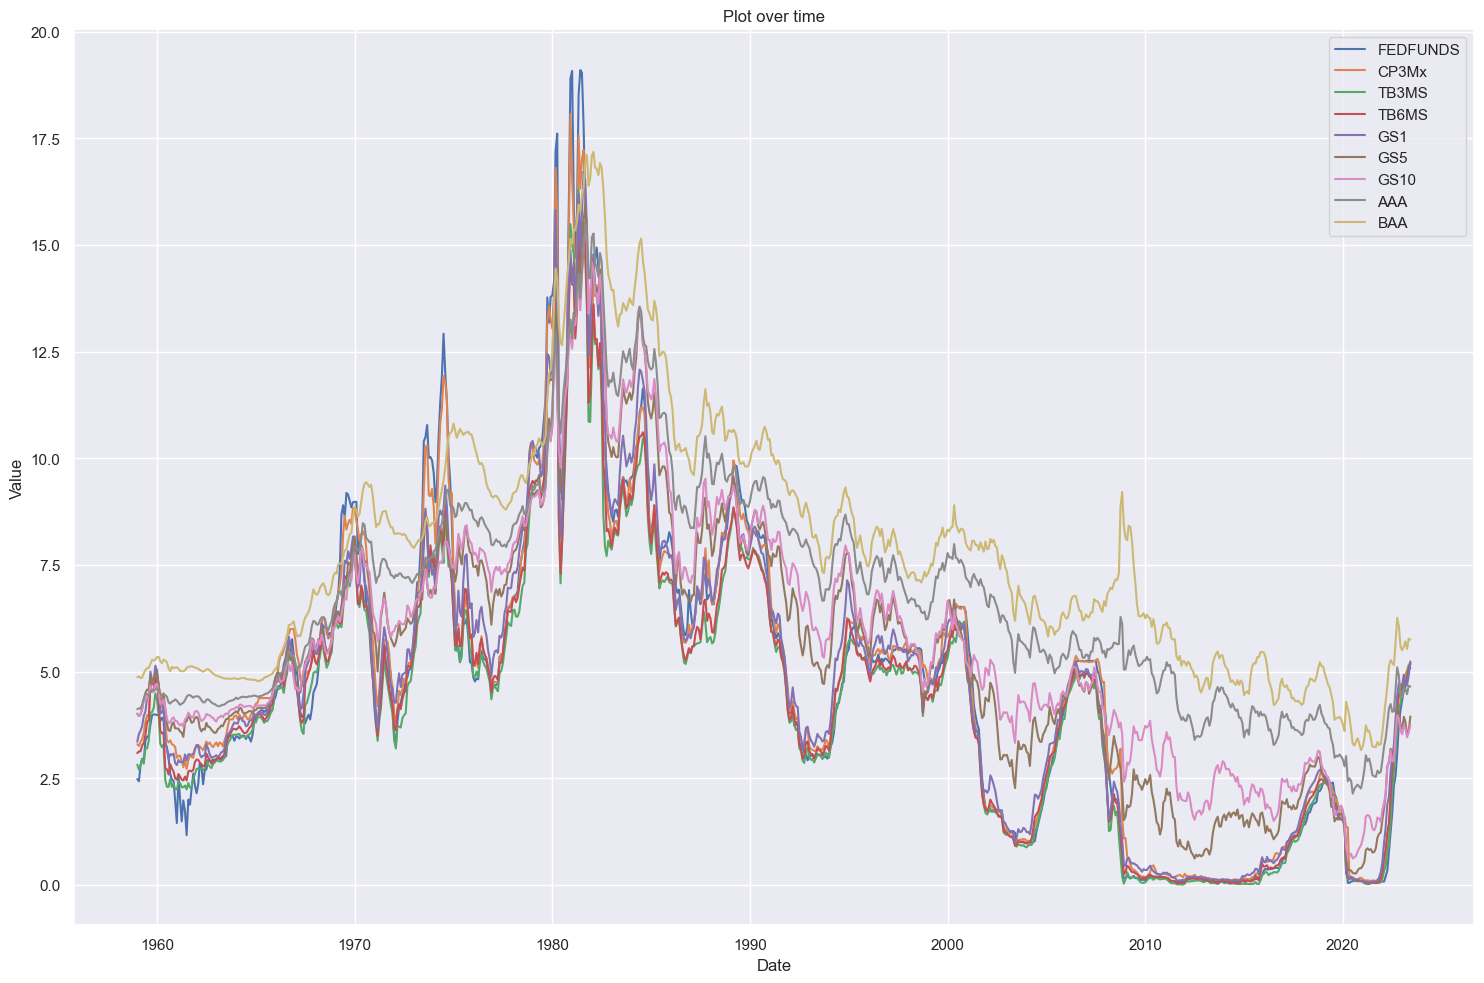

In [171]:
plot_time(subgroup5_1)

#### Subgroup 5.2 plot

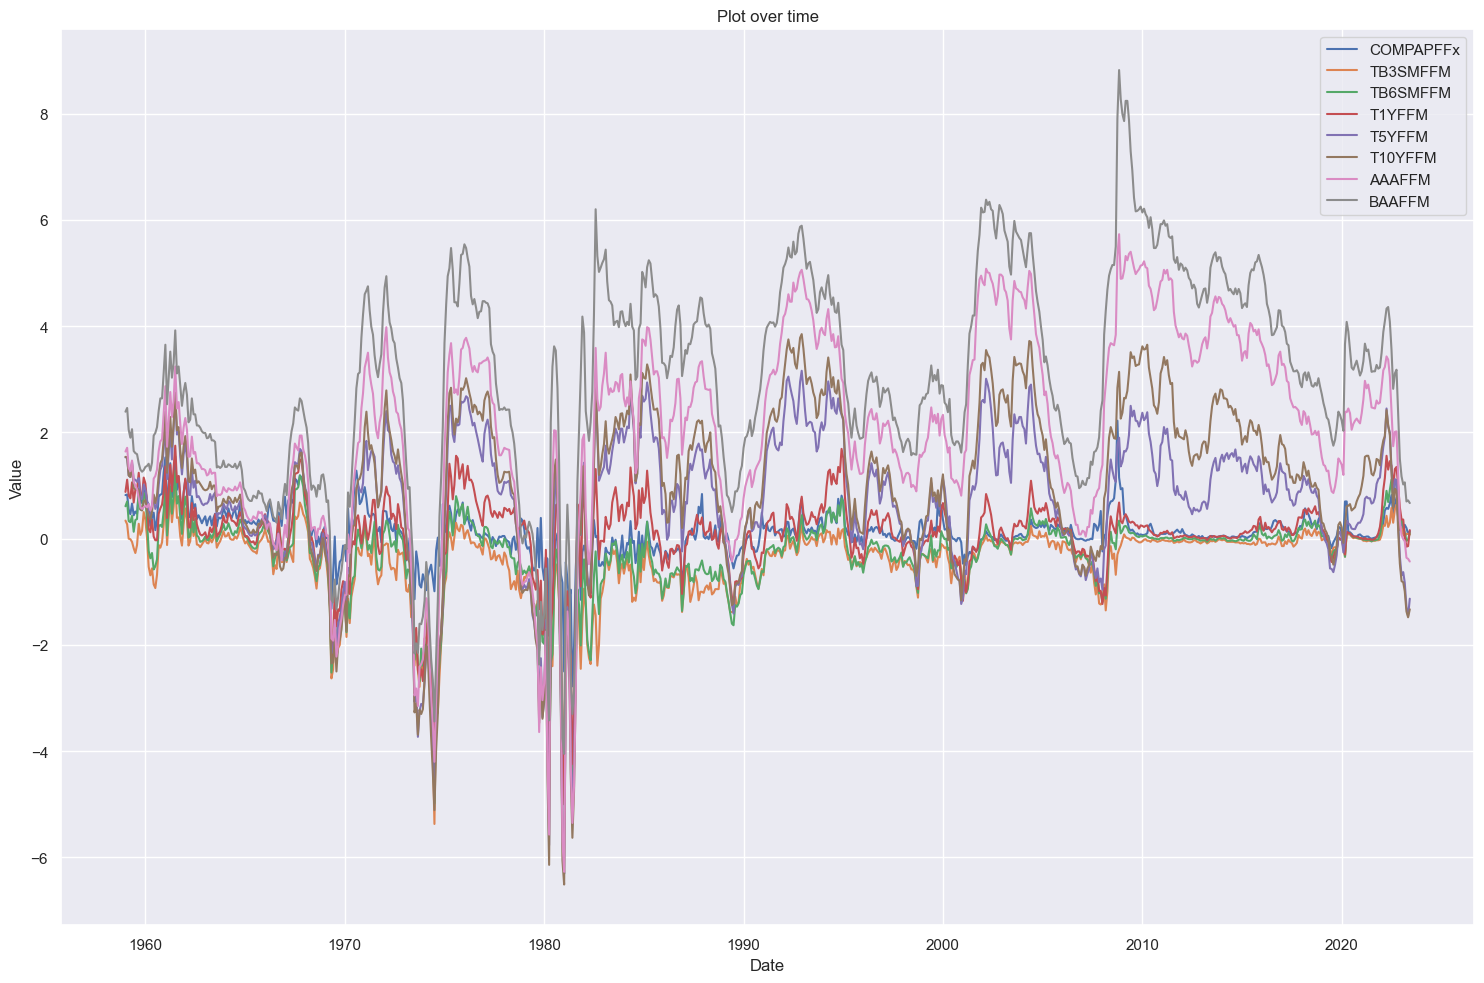

In [172]:
plot_time(subgroup5_2)

#### Subgroup 5.3 plot

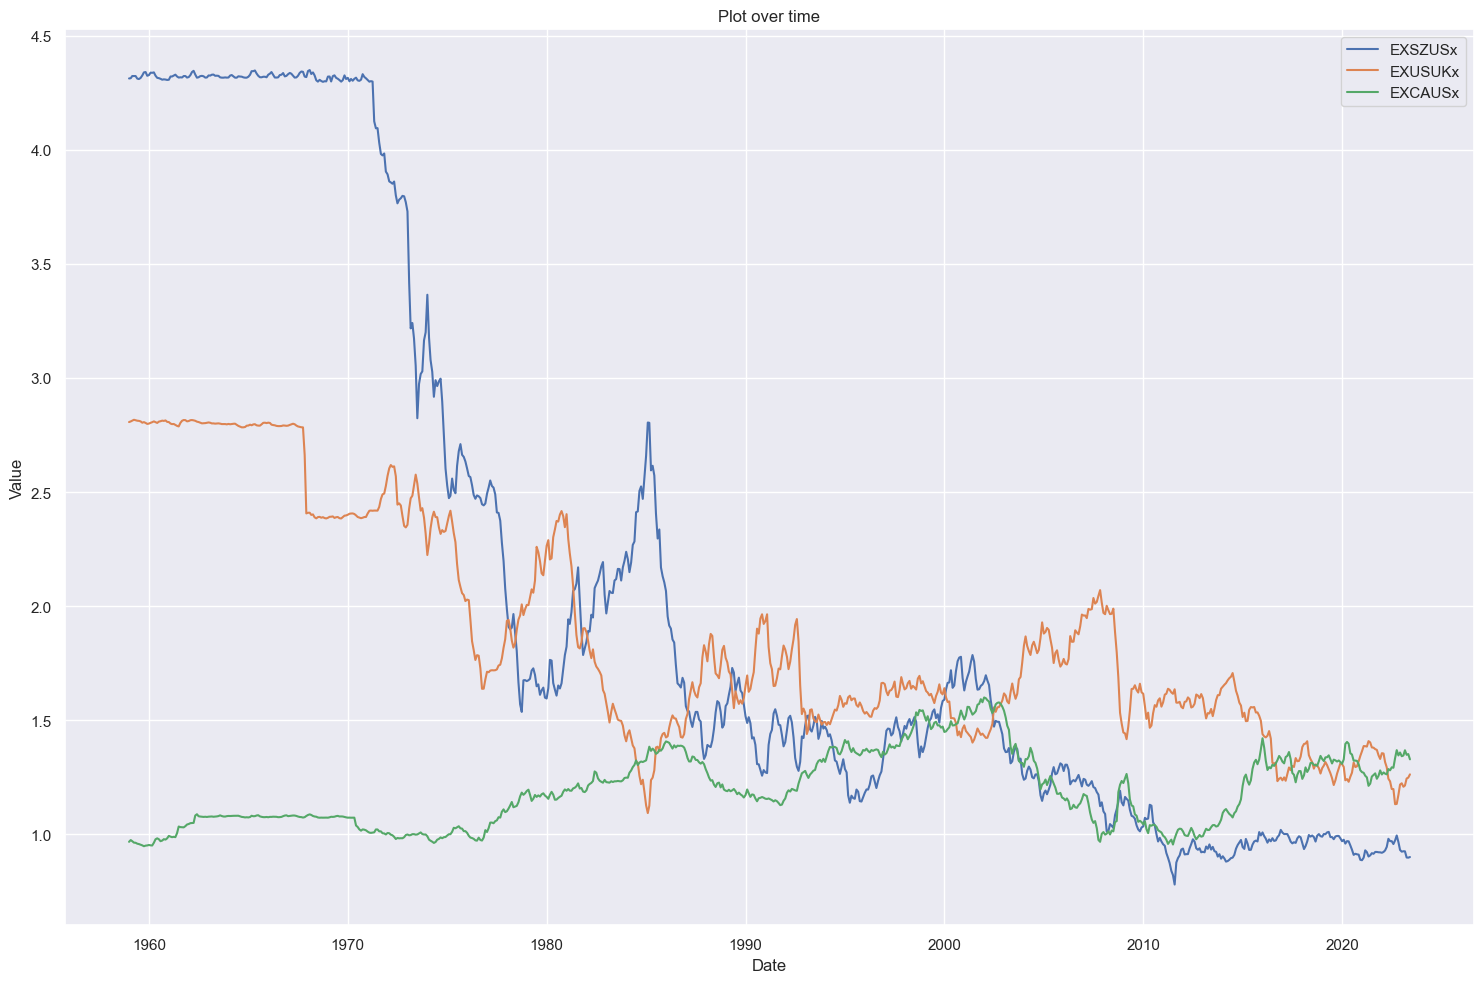

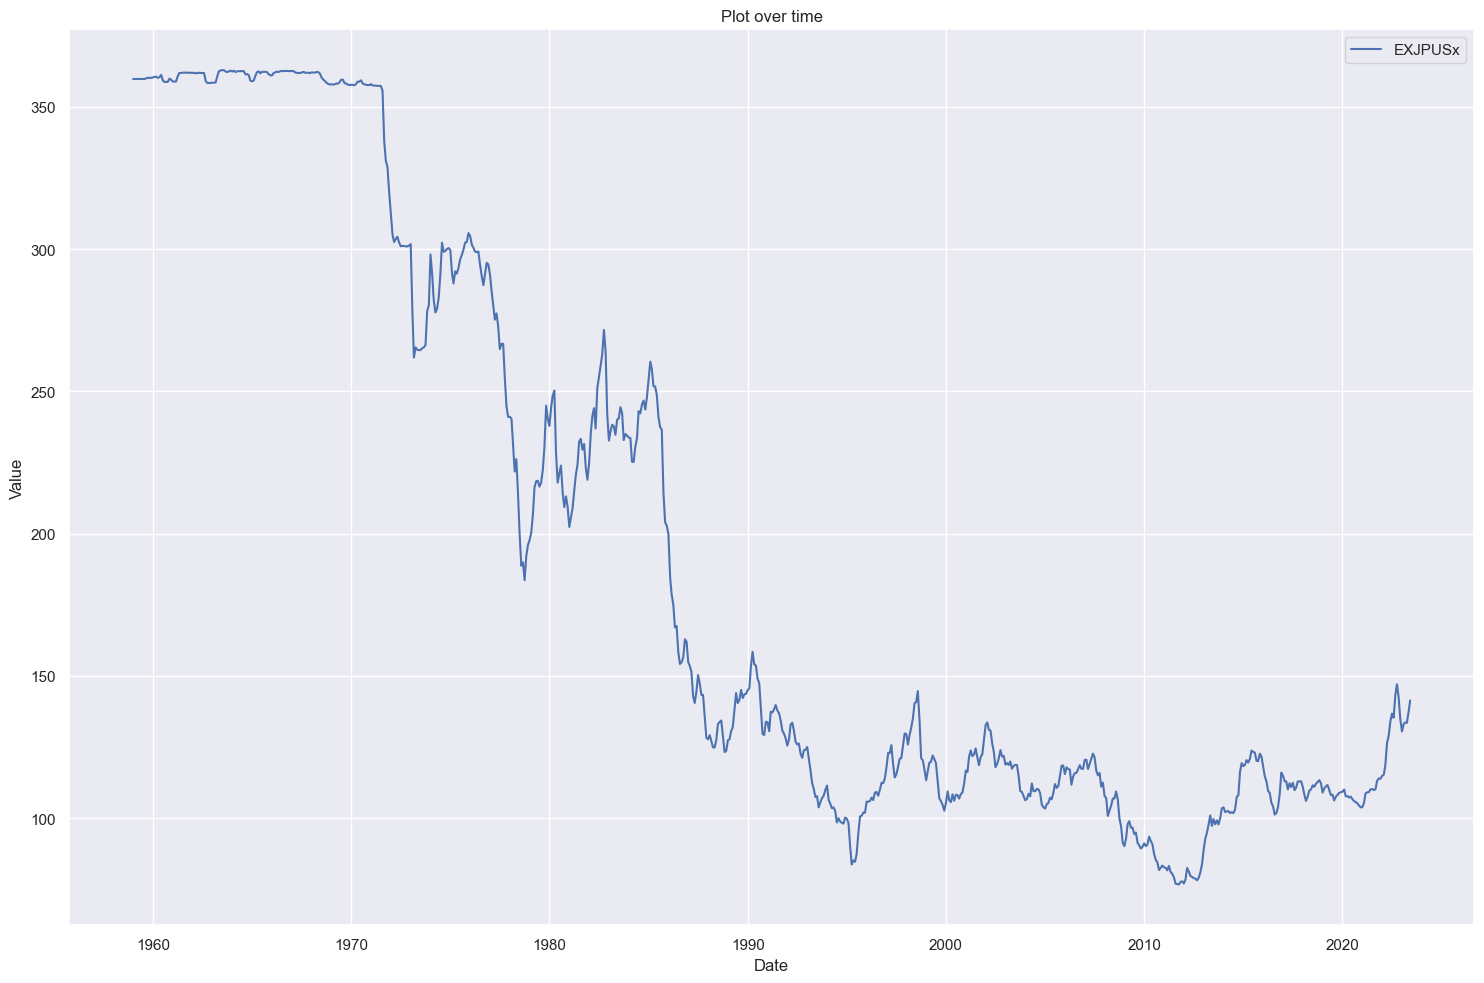

In [173]:
plot_time(subgroup5_3[subgroup5_3_1header])
plot_time(subgroup5_3[subgroup5_3_2header])

#### Subgroup 6.1 plot

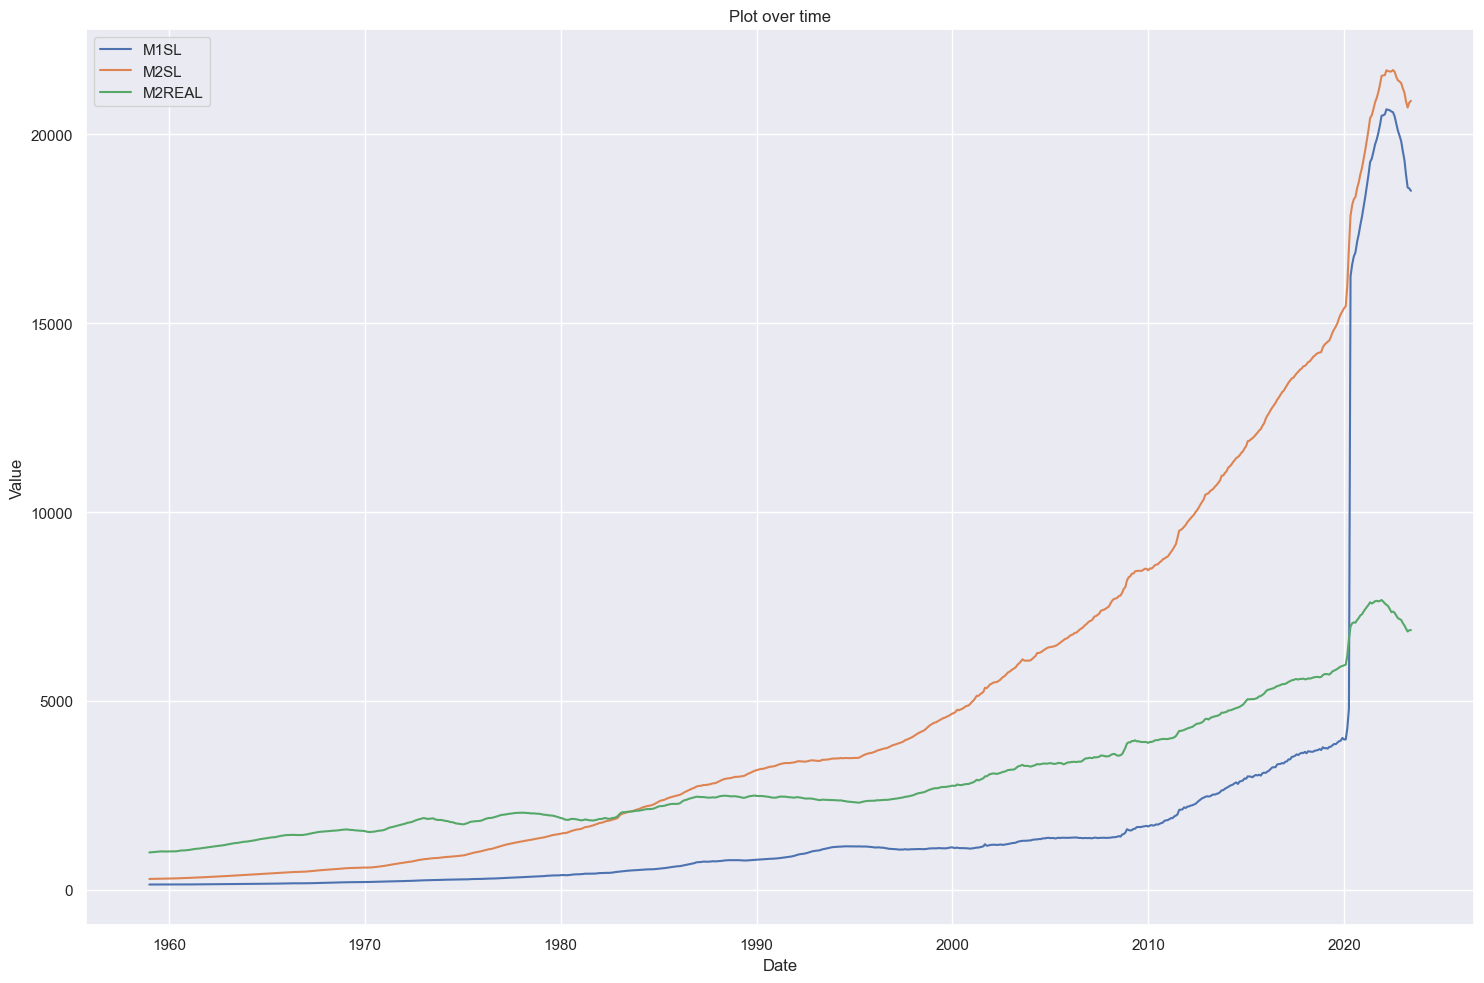

In [174]:
plot_time(subgroup6_1)

#### Subgroup 6.2 plot

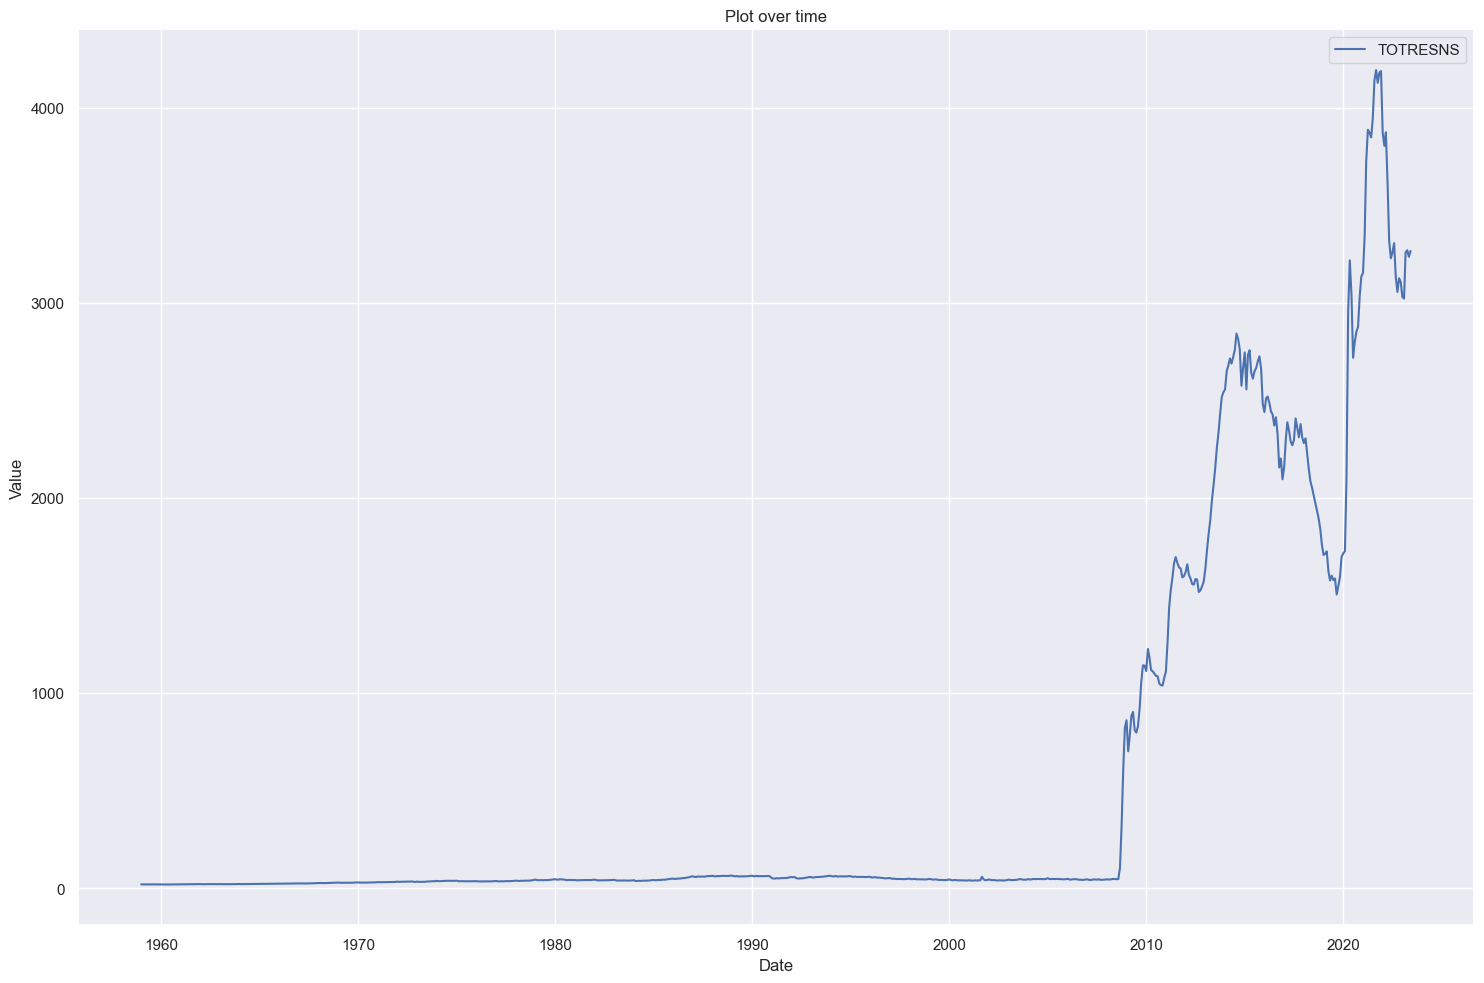

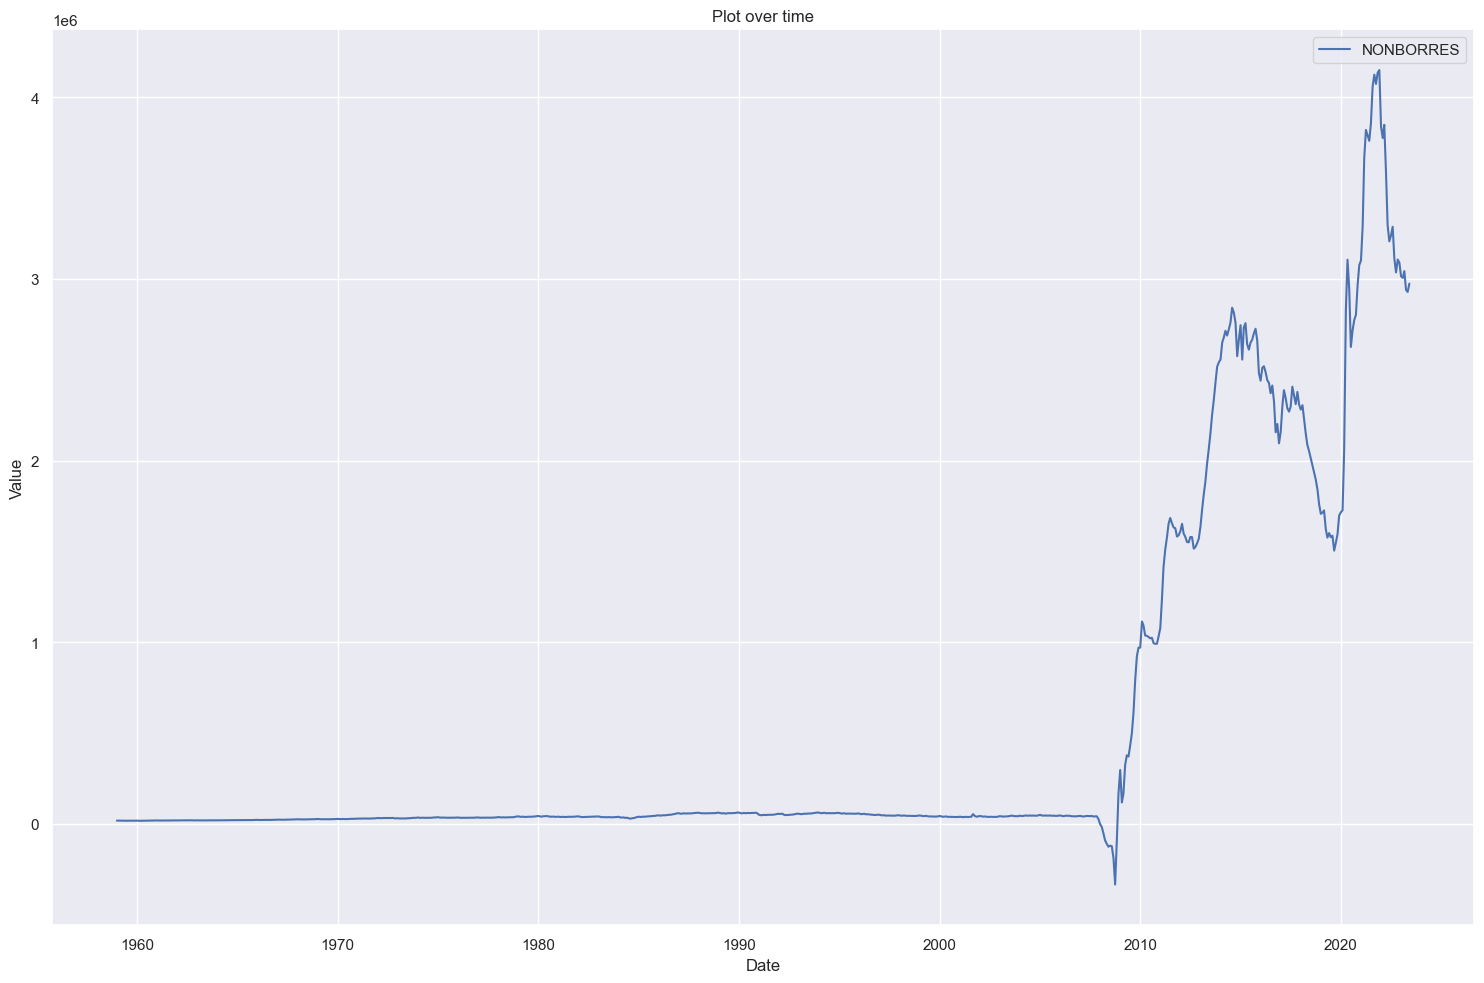

In [175]:
plot_time(subgroup6_2[subgroup6_2_1header])
plot_time(subgroup6_2[subgroup6_2_2header])

#### Subgroup 6.3 plot

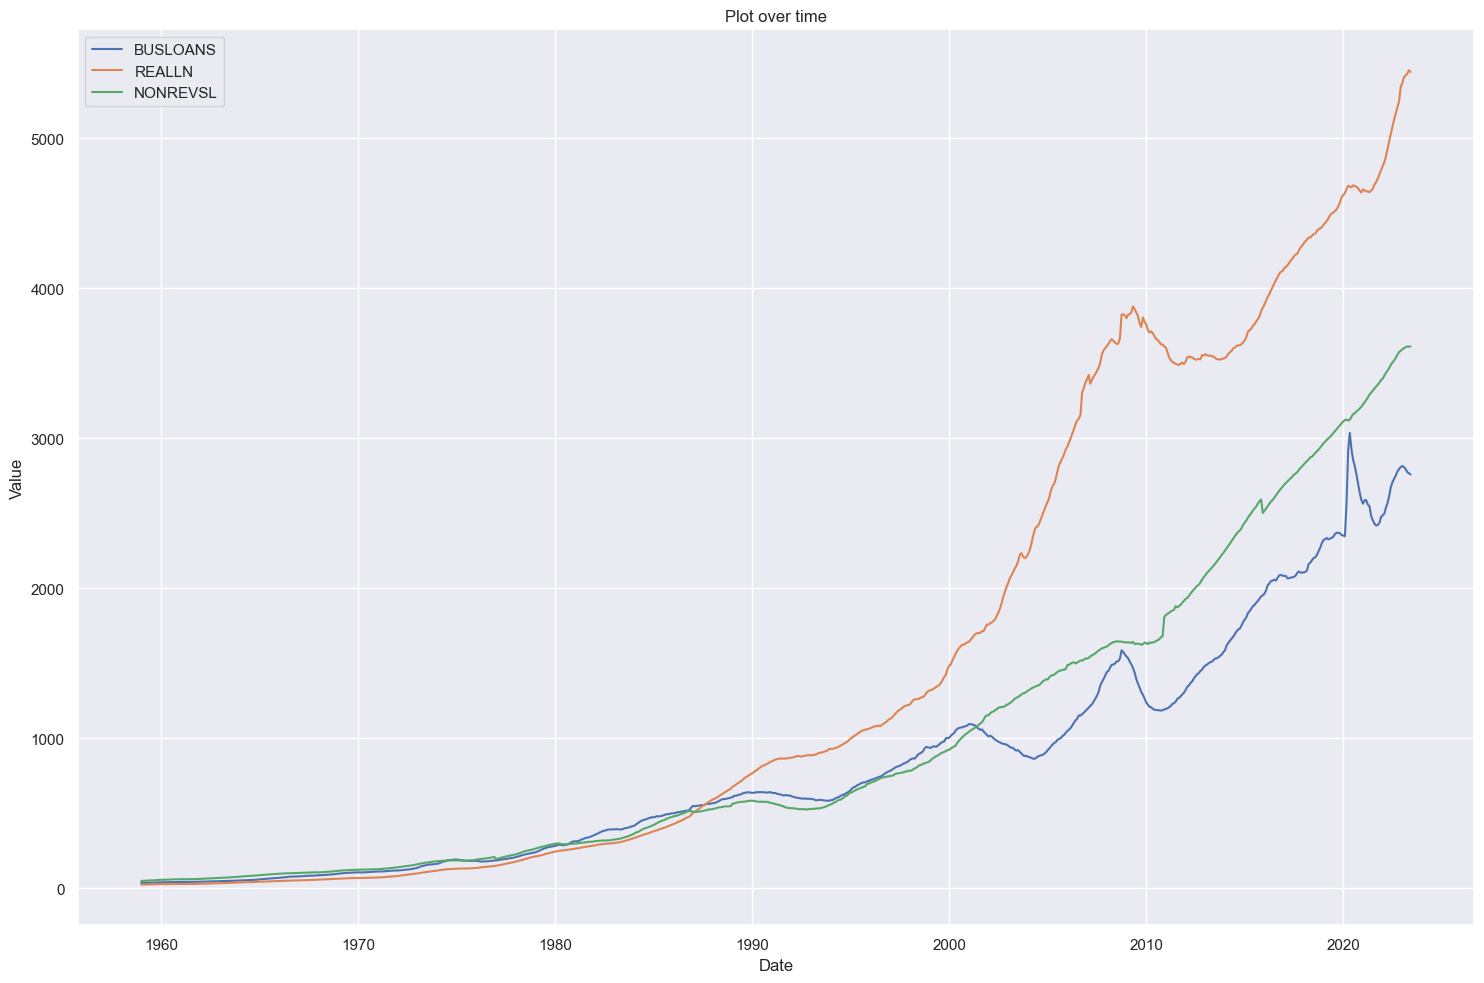

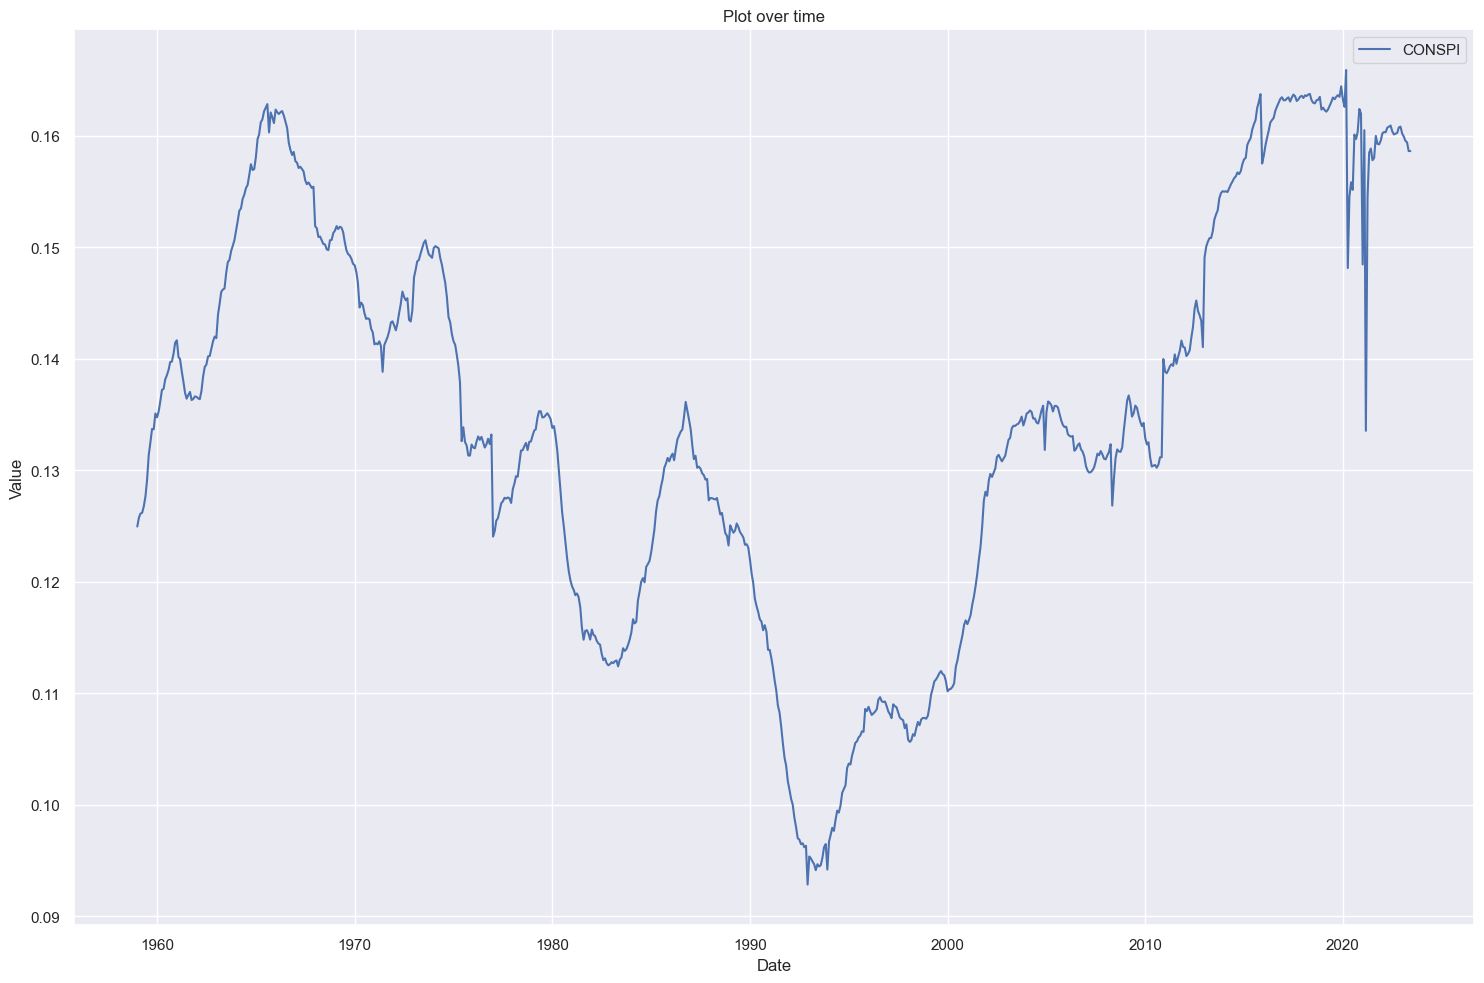

In [176]:
plot_time(subgroup6_3[subgroup6_3_1header])
plot_time(subgroup6_3[subgroup6_3_2header])

#### Subgroup 6.4 plot

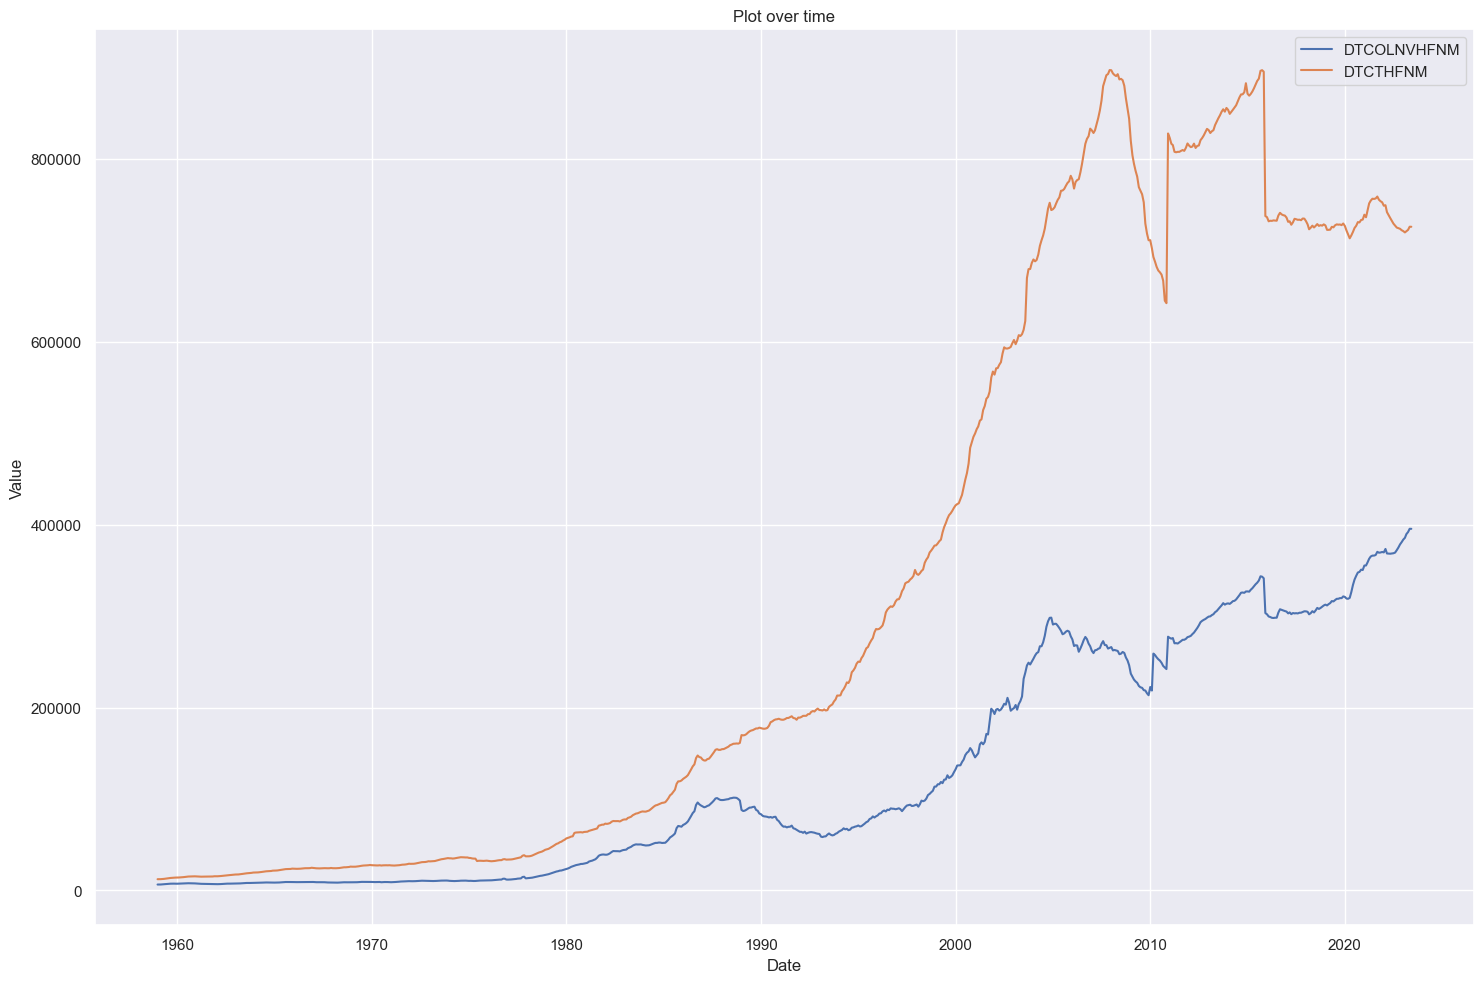

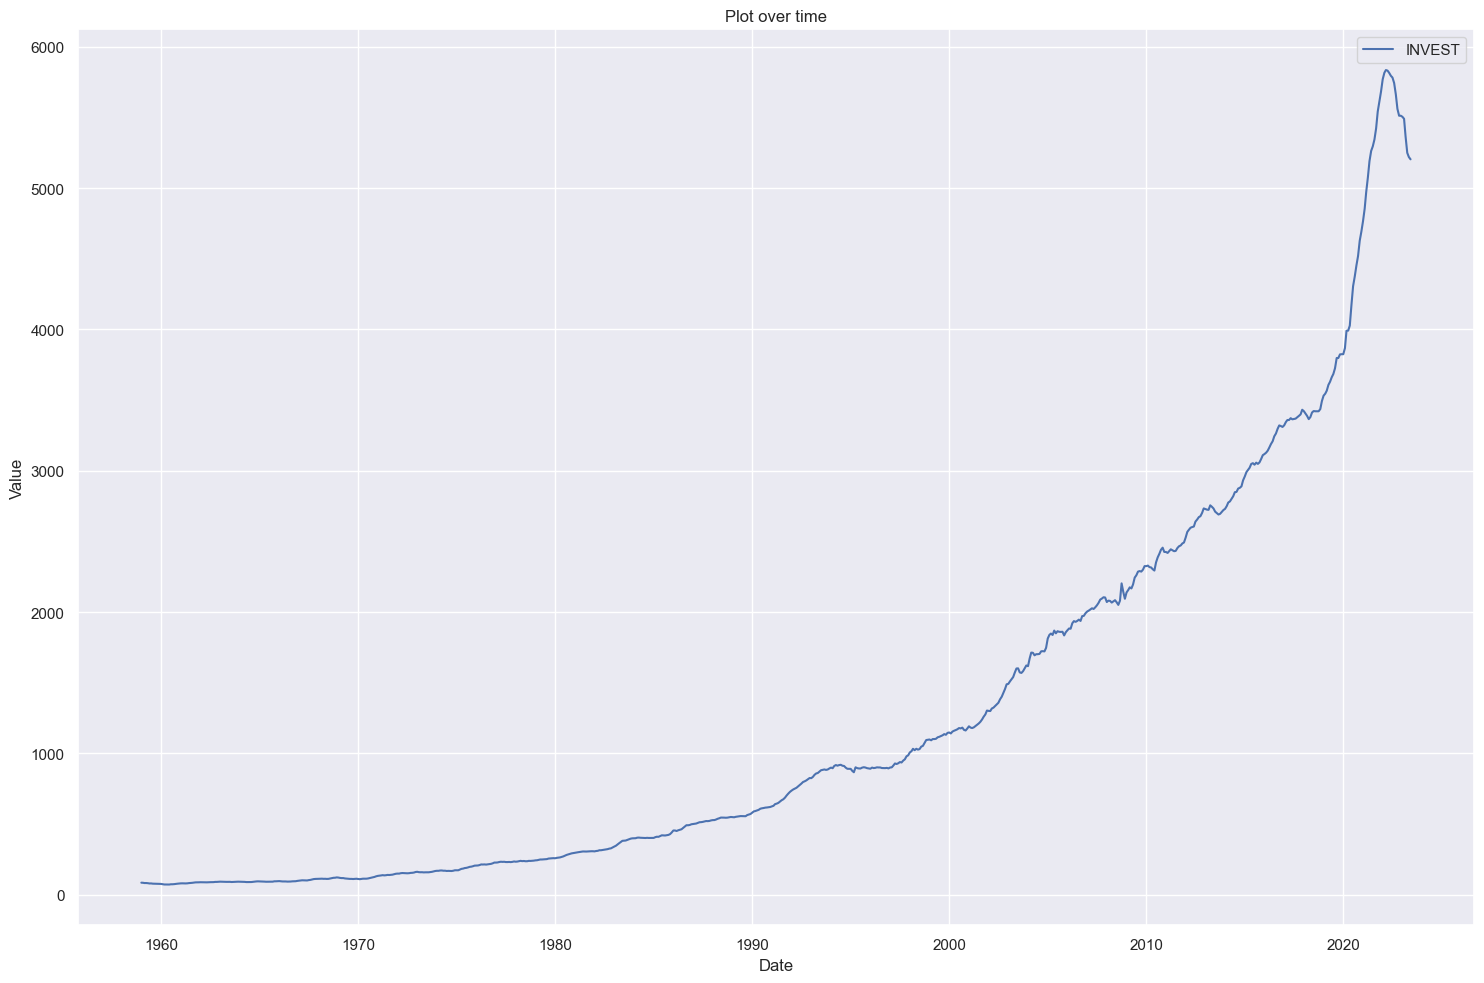

In [177]:
plot_time(subgroup6_4[subgroup6_4_1header])
plot_time(subgroup6_4[subgroup6_4_2header])

#### Subgroup 8.1 plot

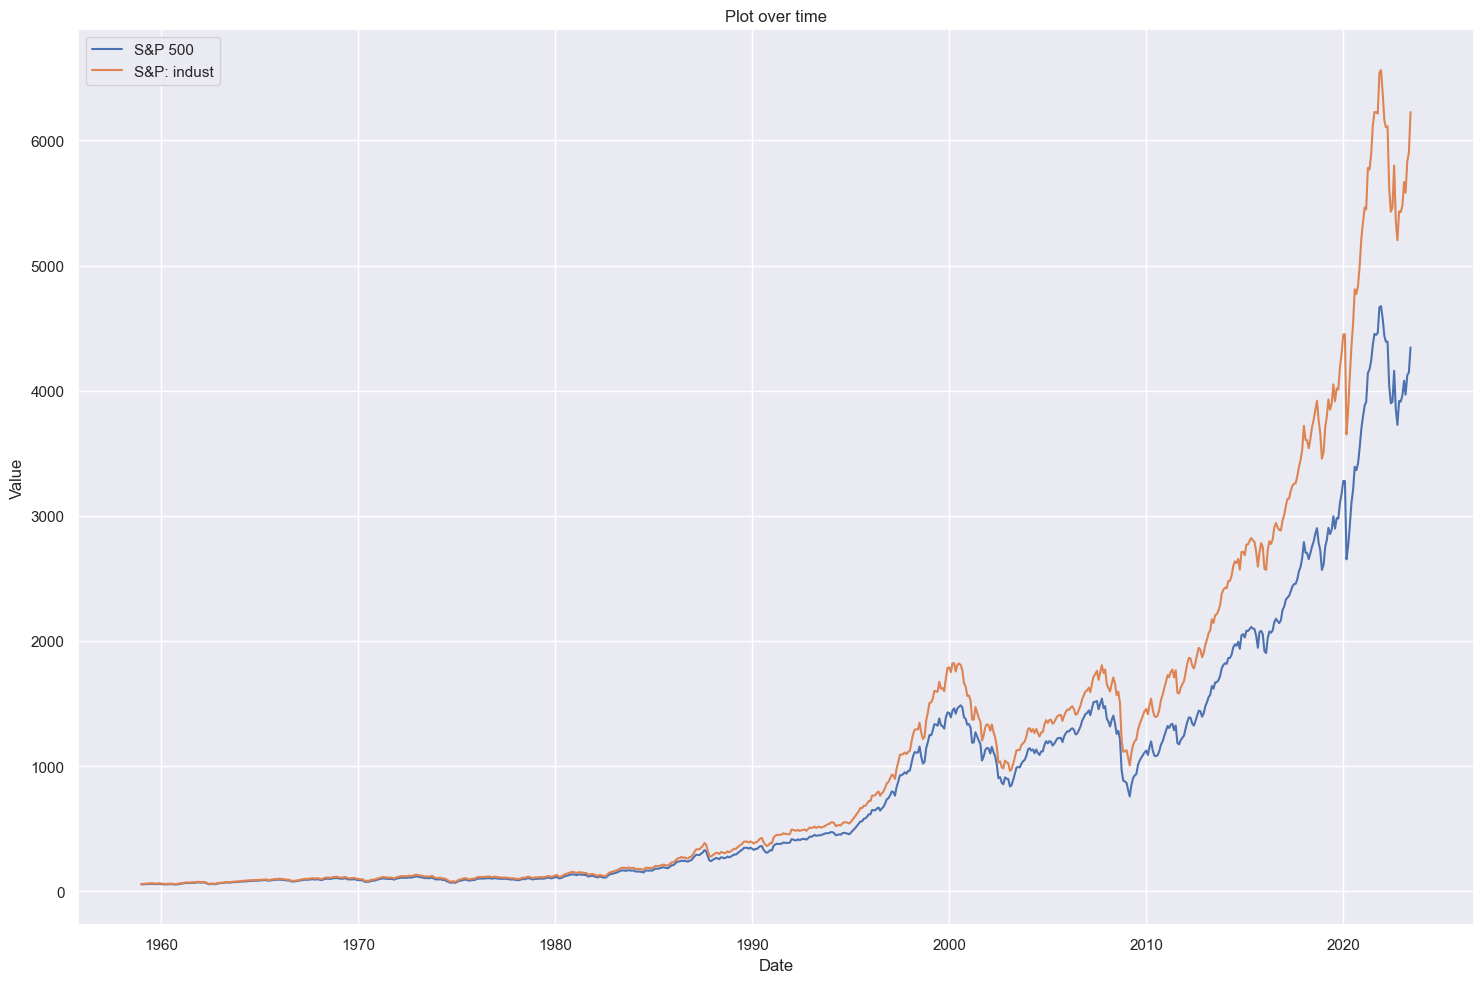

In [178]:
plot_time(subgroup8_1)

#### Subgroup 8.2 plot

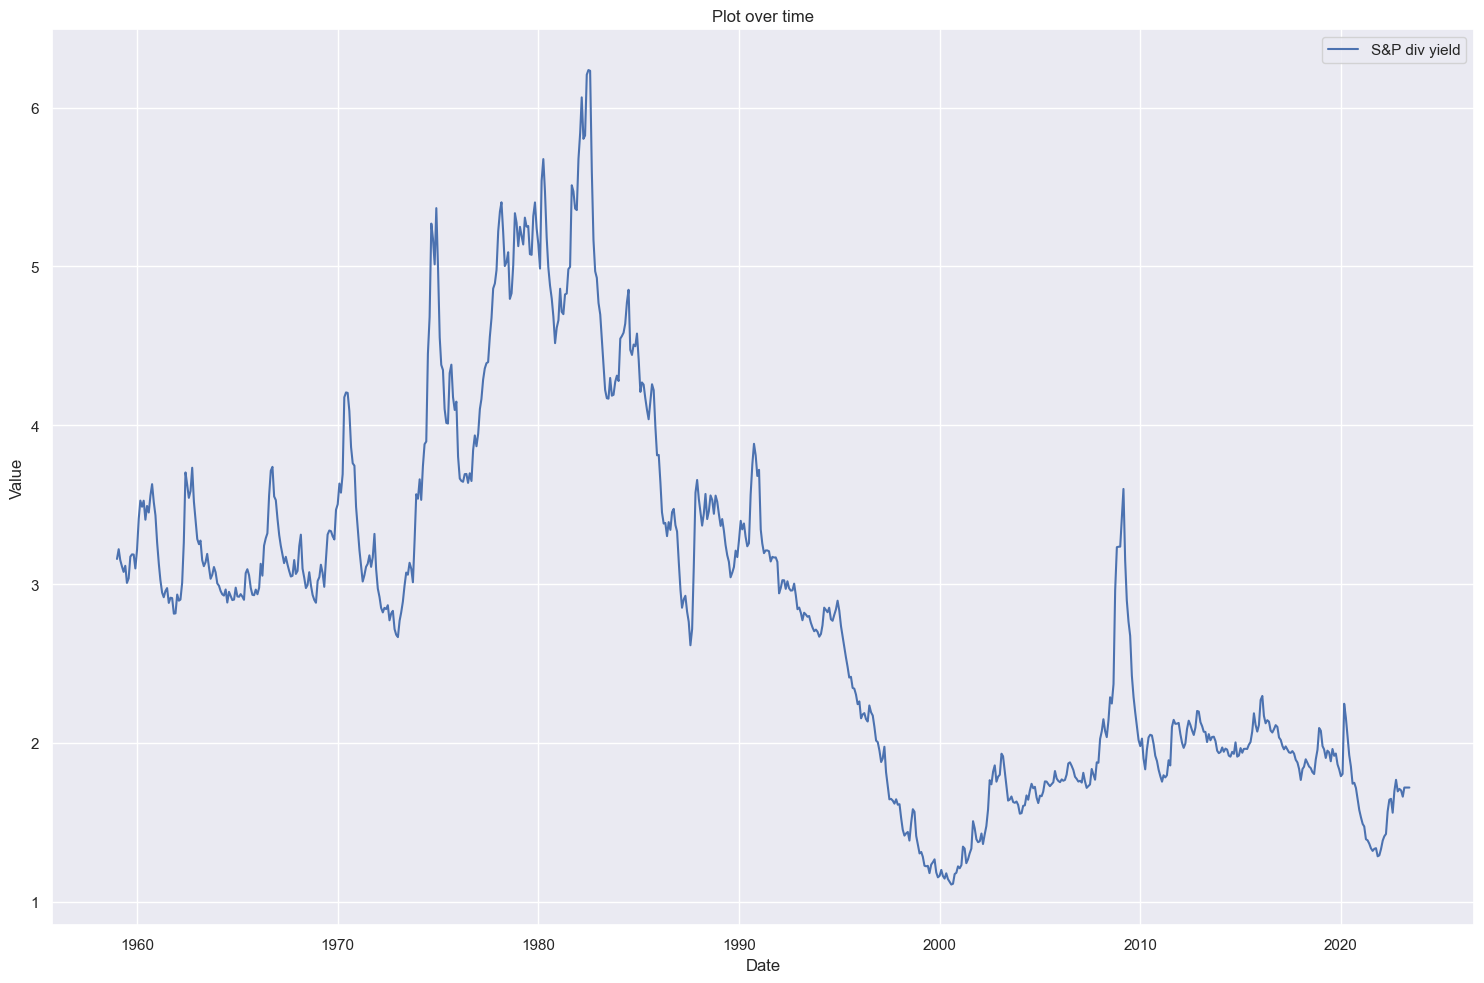

In [179]:
plot_time(subgroup8_2)

#### Subgroup 8.3 plot

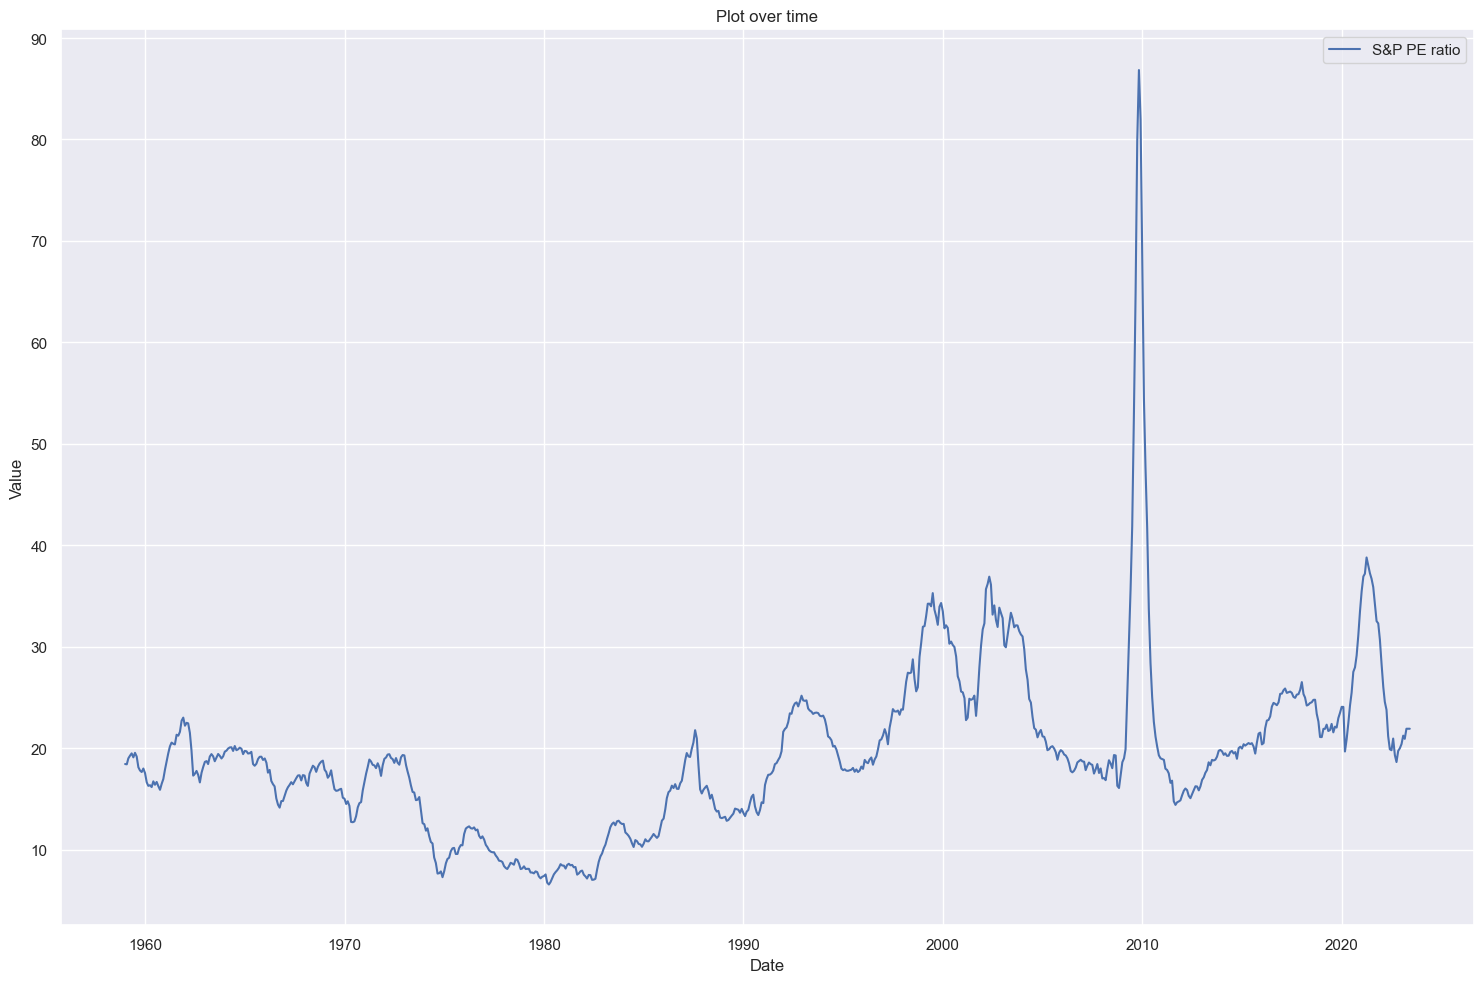

In [180]:
plot_time(subgroup8_3)

### 2.3 Patterns observed from 2.2 and 2.3

•	As discussed in class, interest rates if observed over last 2 years shows significant rise (4.5%), however, historically the interest rates have been much higher (~18% in 1982)

•	Exchange rates have decreased overall historically. It is the relative strength of 2 economies, indicating improved US$ strength relative to other currencies

•	M1, M2 increased in Covid due to several factors: low interest rates, high fiscal stimulus from government, increased savings and reduced spendings, precautionary cash holdings, etc

•	PE ratios spiked post 2008 financial crisis indicating economic recovery   

### 3.1 Autocorrelation factor for subgroups

In [181]:

import statsmodels.api as sm

# Function to plot ACF for a given data array
# Chat gpt prompt used: 'What is the function to find autocorrelation factor of any array'
def plot_acf(group):

    column_name = group.columns[0]  
    column_data = group[column_name].values  
    # Calculate the ACF
    acf = sm.tsa.acf(column_data, nlags=240)

    # Plot the ACF
    plt.figure(figsize=(8, 4))
    plt.stem(range(len(acf)), acf, basefmt=" ", use_line_collection=True)
    plt.title(f'Autocorrelation Function (ACF) - {column_name}')
    plt.xlabel('Lag')
    plt.ylabel('ACF Value')
    plt.grid(True)
    plt.show()



C:\Users\Jinay Shah\AppData\Local\Temp\ipykernel_37032\193066098.py:14: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(acf)), acf, basefmt=" ", use_line_collection=True)


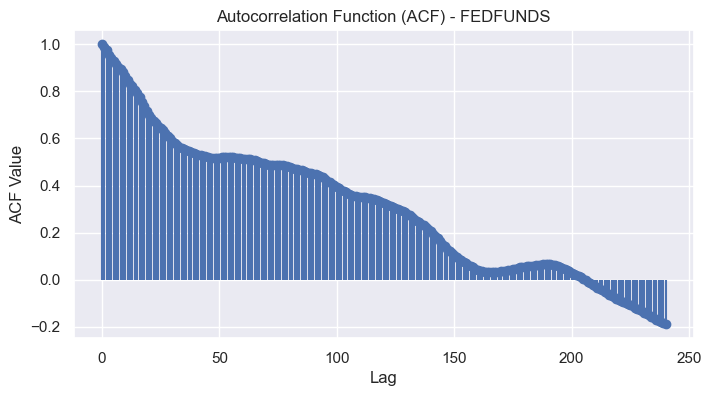

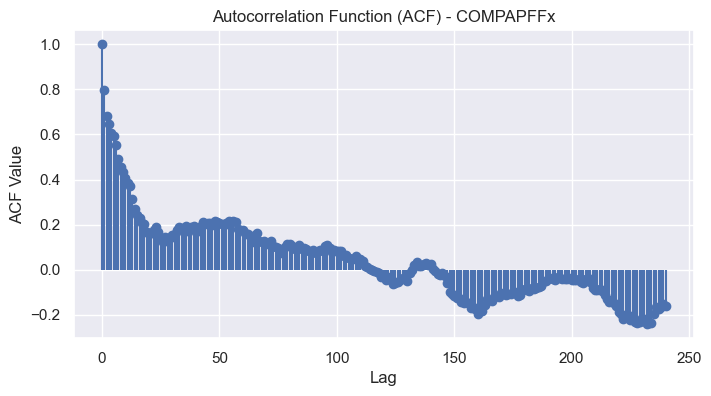

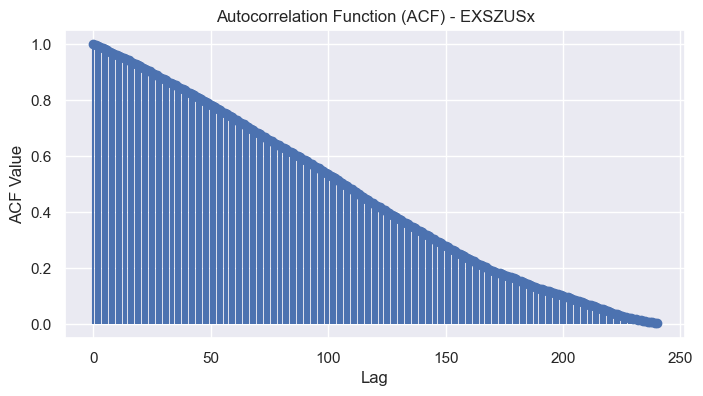

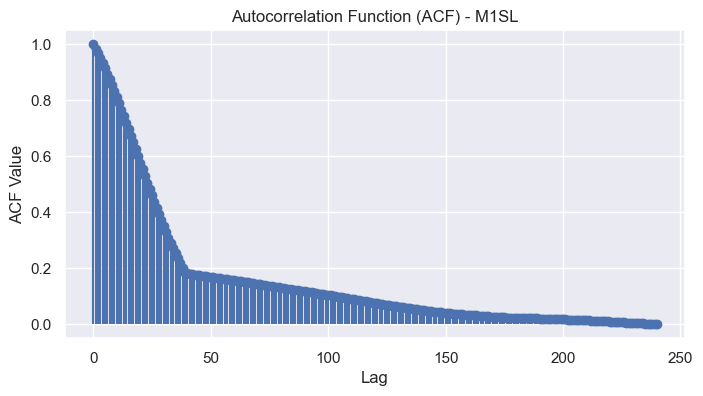

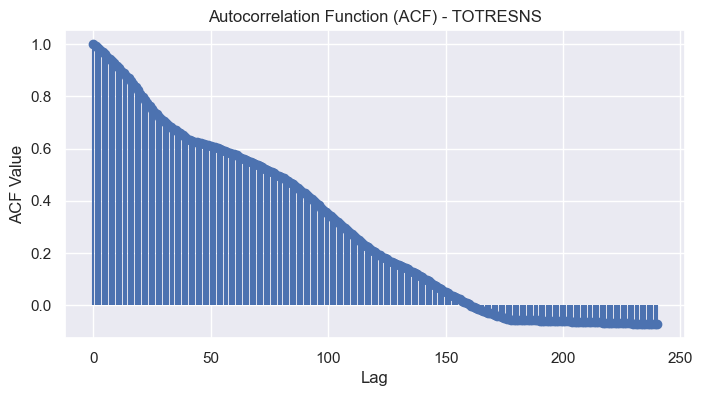

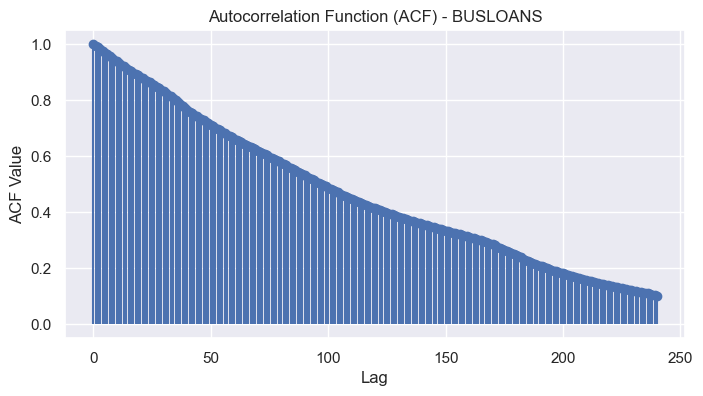

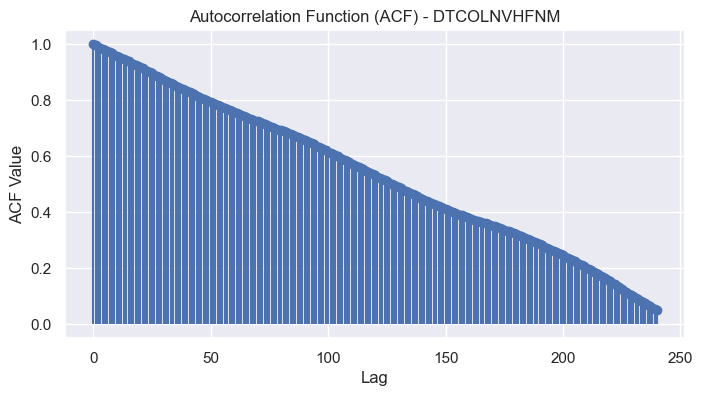

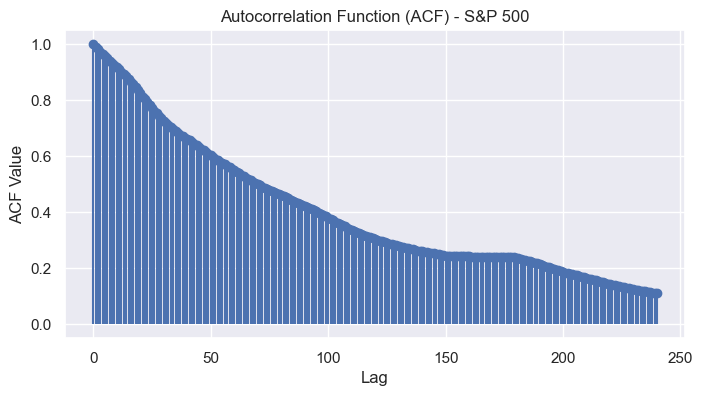

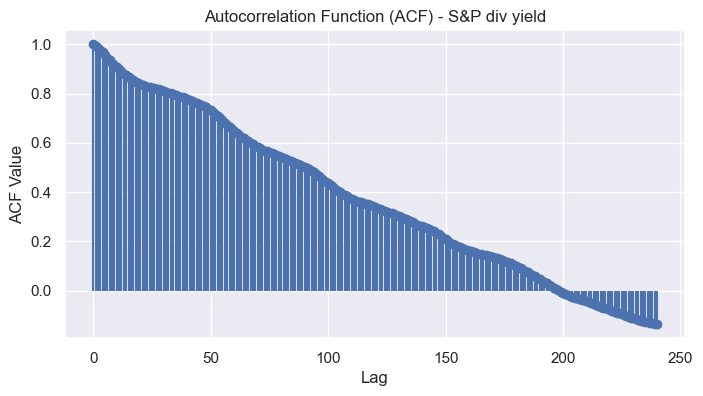

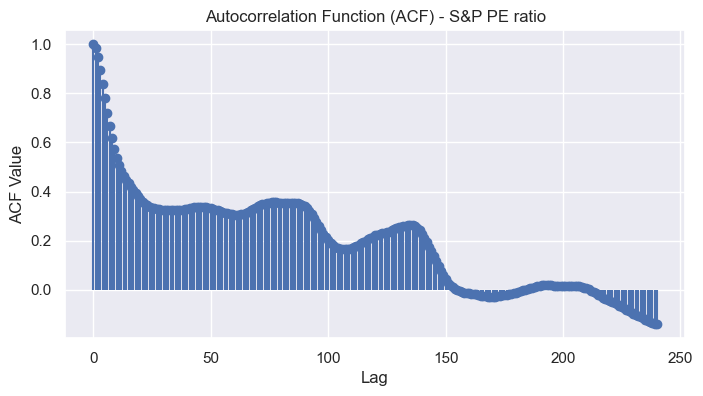

In [182]:
plot_acf(subgroup5_1)
plot_acf(subgroup5_2)
plot_acf(subgroup5_3)
plot_acf(subgroup6_1)
plot_acf(subgroup6_2)
plot_acf(subgroup6_3)
plot_acf(subgroup6_4)
plot_acf(subgroup8_1)
plot_acf(subgroup8_2)
plot_acf(subgroup8_3)



### 3.3 and 3.3 

For a lag upto 200 months, most of the varaibles show a decreasing trend in correlation. This is because, as more time is lapsed, the correlation becomes decreasingly significant.

### 4. Correlation of Group 5 and Group 8

In [183]:
# Creating a function for correlation of two matrix

def corr_2matrix(df1,df2,min_val,max_val):
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True)
    df_header = merged_df.columns
    # Calculating the correlation matrix
    correl_matrix = merged_df[df_header].corr()
    df1_header = df1.columns
    df1_length = len(df1_header)
    df2_header = df2.columns
    df2_length = len(df2_header)
    fig_size = max(df1_length, df2_length)
    correl_2matrix = correl_matrix.iloc[0:df1_length,df1_length:]

    # Creating a heatmap
    plt.figure(figsize=(fig_size,fig_size))
    sns.set(font_scale=1.0)
    sns.heatmap(correl_2matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=min_val, vmax=max_val, center=(min_val+max_val)/2)
    plt.title('Correlation Heatmap')
    plt.show()

### 4.1 Creating hetmap between Group 5 and Group 8

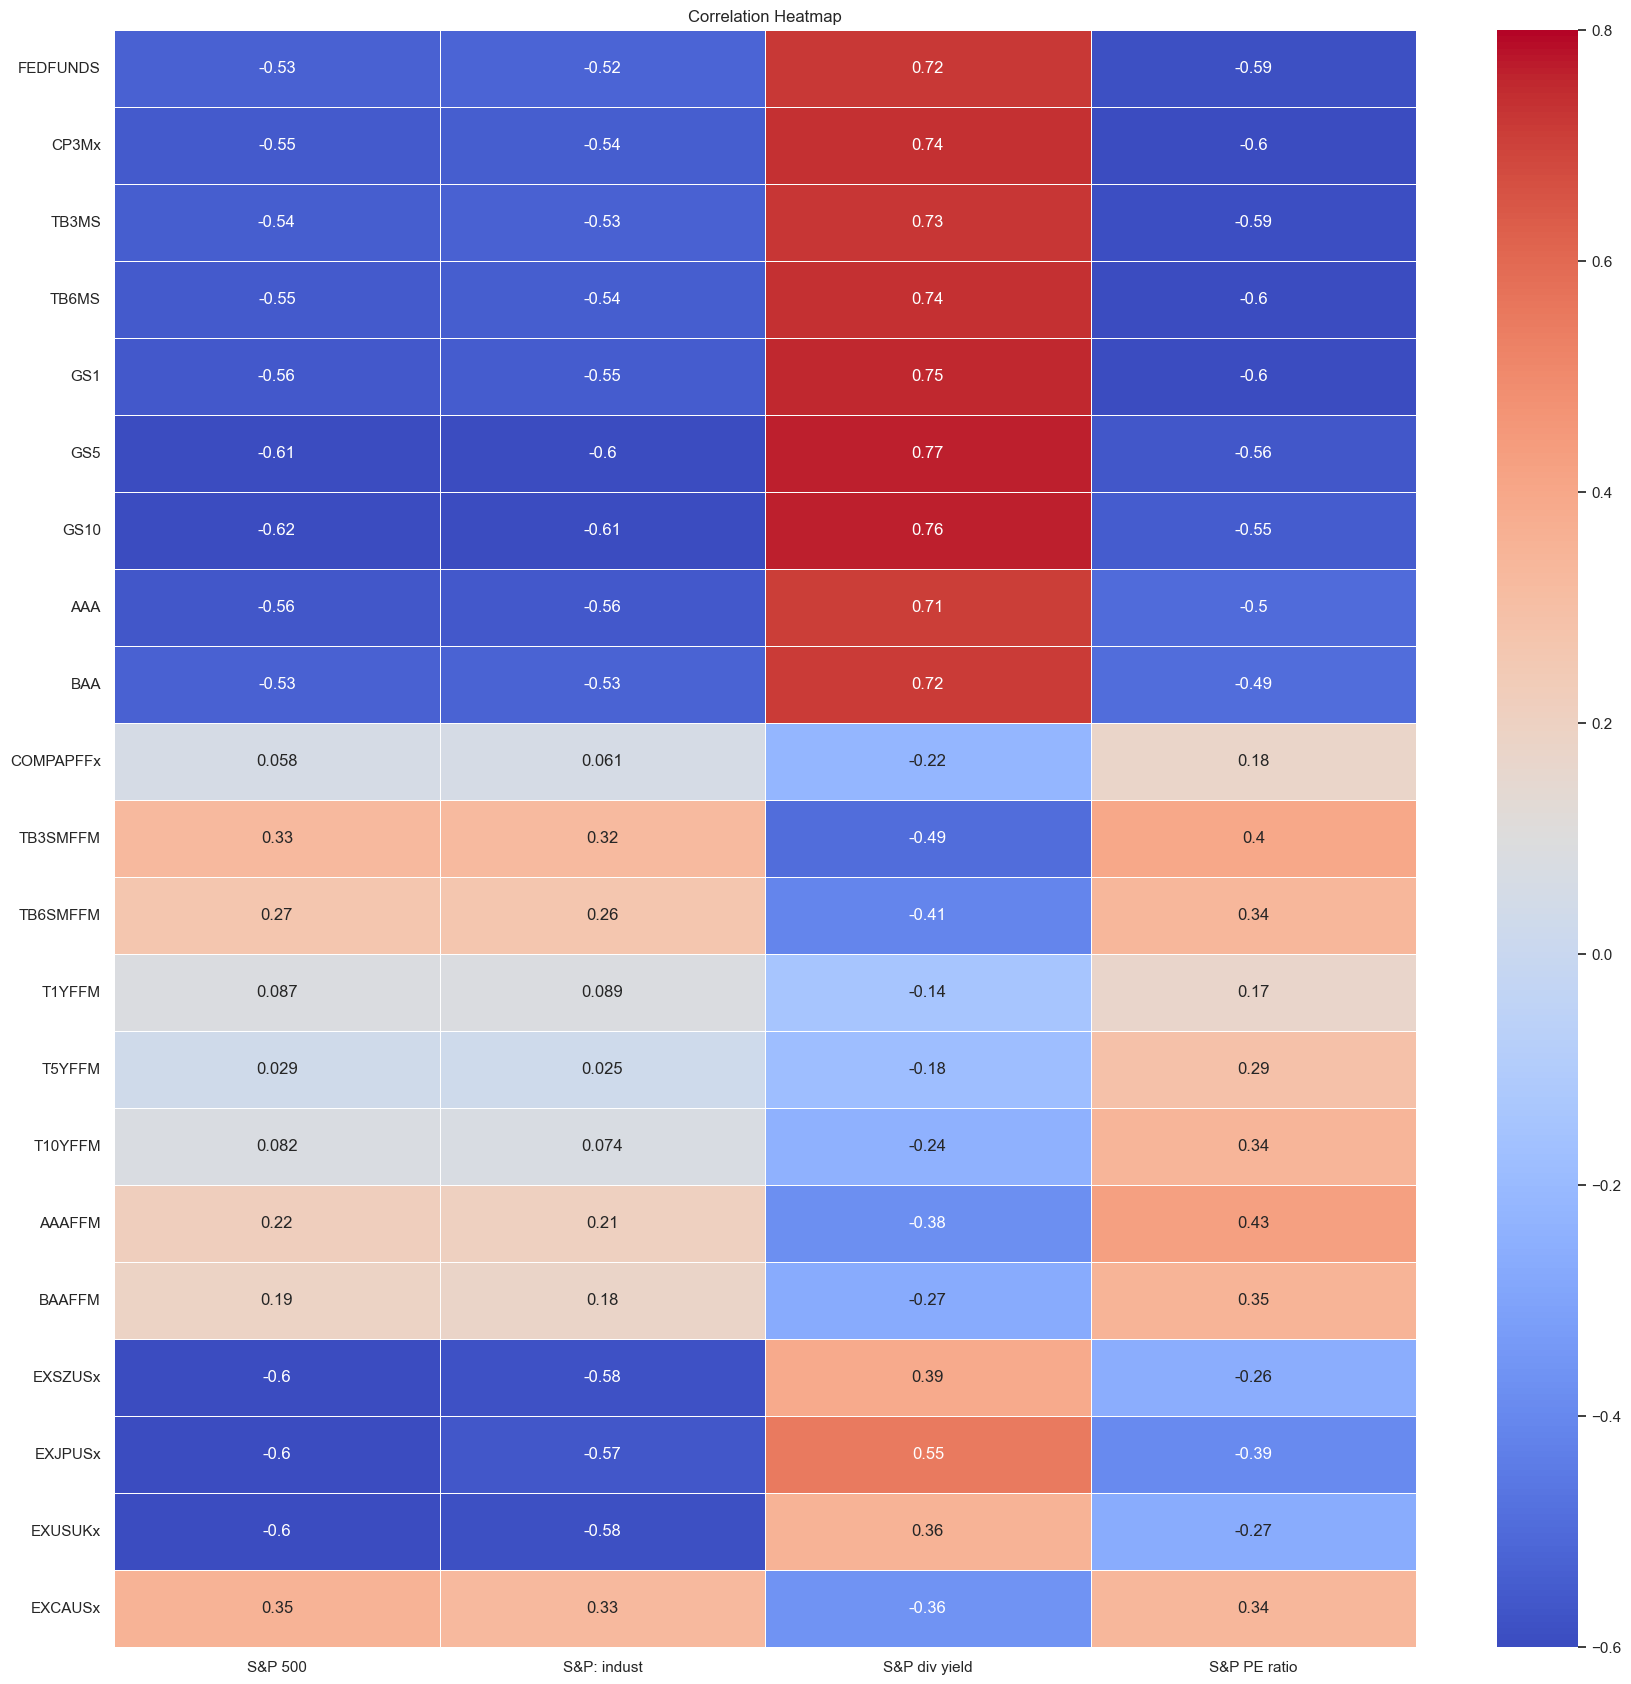

In [184]:
corr_2matrix(group5, group8,-0.6,0.8)

### 4.1 Analysis

•	Interest rates show negative correlation with stock market and positve correlation with divident yields. As low interest rates makes it cheaper for companies to borrow and invest/expand resulting to high stocks. High interest rates causes may cause companies to increase dividends to compete with other fixed income investments

### 4.2 Correlation of Group 5 with Group 8 (Lag/Lead)

In [185]:
# Creating a matrix with lag and lead data of S&P 500 

n = 6  # Number of lags and leads
sp = group8.columns[0]

sp_500_lag_lead = pd.DataFrame()

sp_500_lag_lead[f'{sp}_lead_{180}'] = group8[sp].shift(-180)
sp_500_lag_lead[f'{sp}_lead_{120}'] = group8[sp].shift(-120)
sp_500_lag_lead[f'{sp}_lead_{60}'] = group8[sp].shift(-60)
for i in range(1, n + 1):
    sp_500_lag_lead[f'{sp}_lead_{6*(n+1)-6*i}'] = group8[sp].shift(-6*(n-i+1))
    # here s&p will lag as compared to any indicator --> the indicator would be a leading indicator
sp_500_lag_lead[f'{sp}_lead_{3}'] = group8[sp].shift(-3)
sp_500_lag_lead[f'{sp}_lead_{2}'] = group8[sp].shift(-2)
sp_500_lag_lead[f'{sp}_lead_{1}'] = group8[sp].shift(-1)
sp_500_lag_lead[sp] = group8[sp]
sp_500_lag_lead[f'{sp}_lag_{1}'] = group8[sp].shift(1)
sp_500_lag_lead[f'{sp}_lag_{2}'] = group8[sp].shift(2)
sp_500_lag_lead[f'{sp}_lag_{3}'] = group8[sp].shift(3)
for i in range(1, n + 1):
    sp_500_lag_lead[f'{sp}_lag_{6*i}'] = group8[sp].shift(6*i)
    # here s&p will lead as compared to any indicator --> the indicator would be a lagging indicator
sp_500_lag_lead[f'{sp}_lag_{60}'] = group8[sp].shift(60)
sp_500_lag_lead[f'{sp}_lag_{120}'] = group8[sp].shift(120)
sp_500_lag_lead[f'{sp}_lag_{180}'] = group8[sp].shift(180)


sp_500_lag_lead = sp_500_lag_lead.ffill()
sp_500_lag_lead = sp_500_lag_lead.bfill()

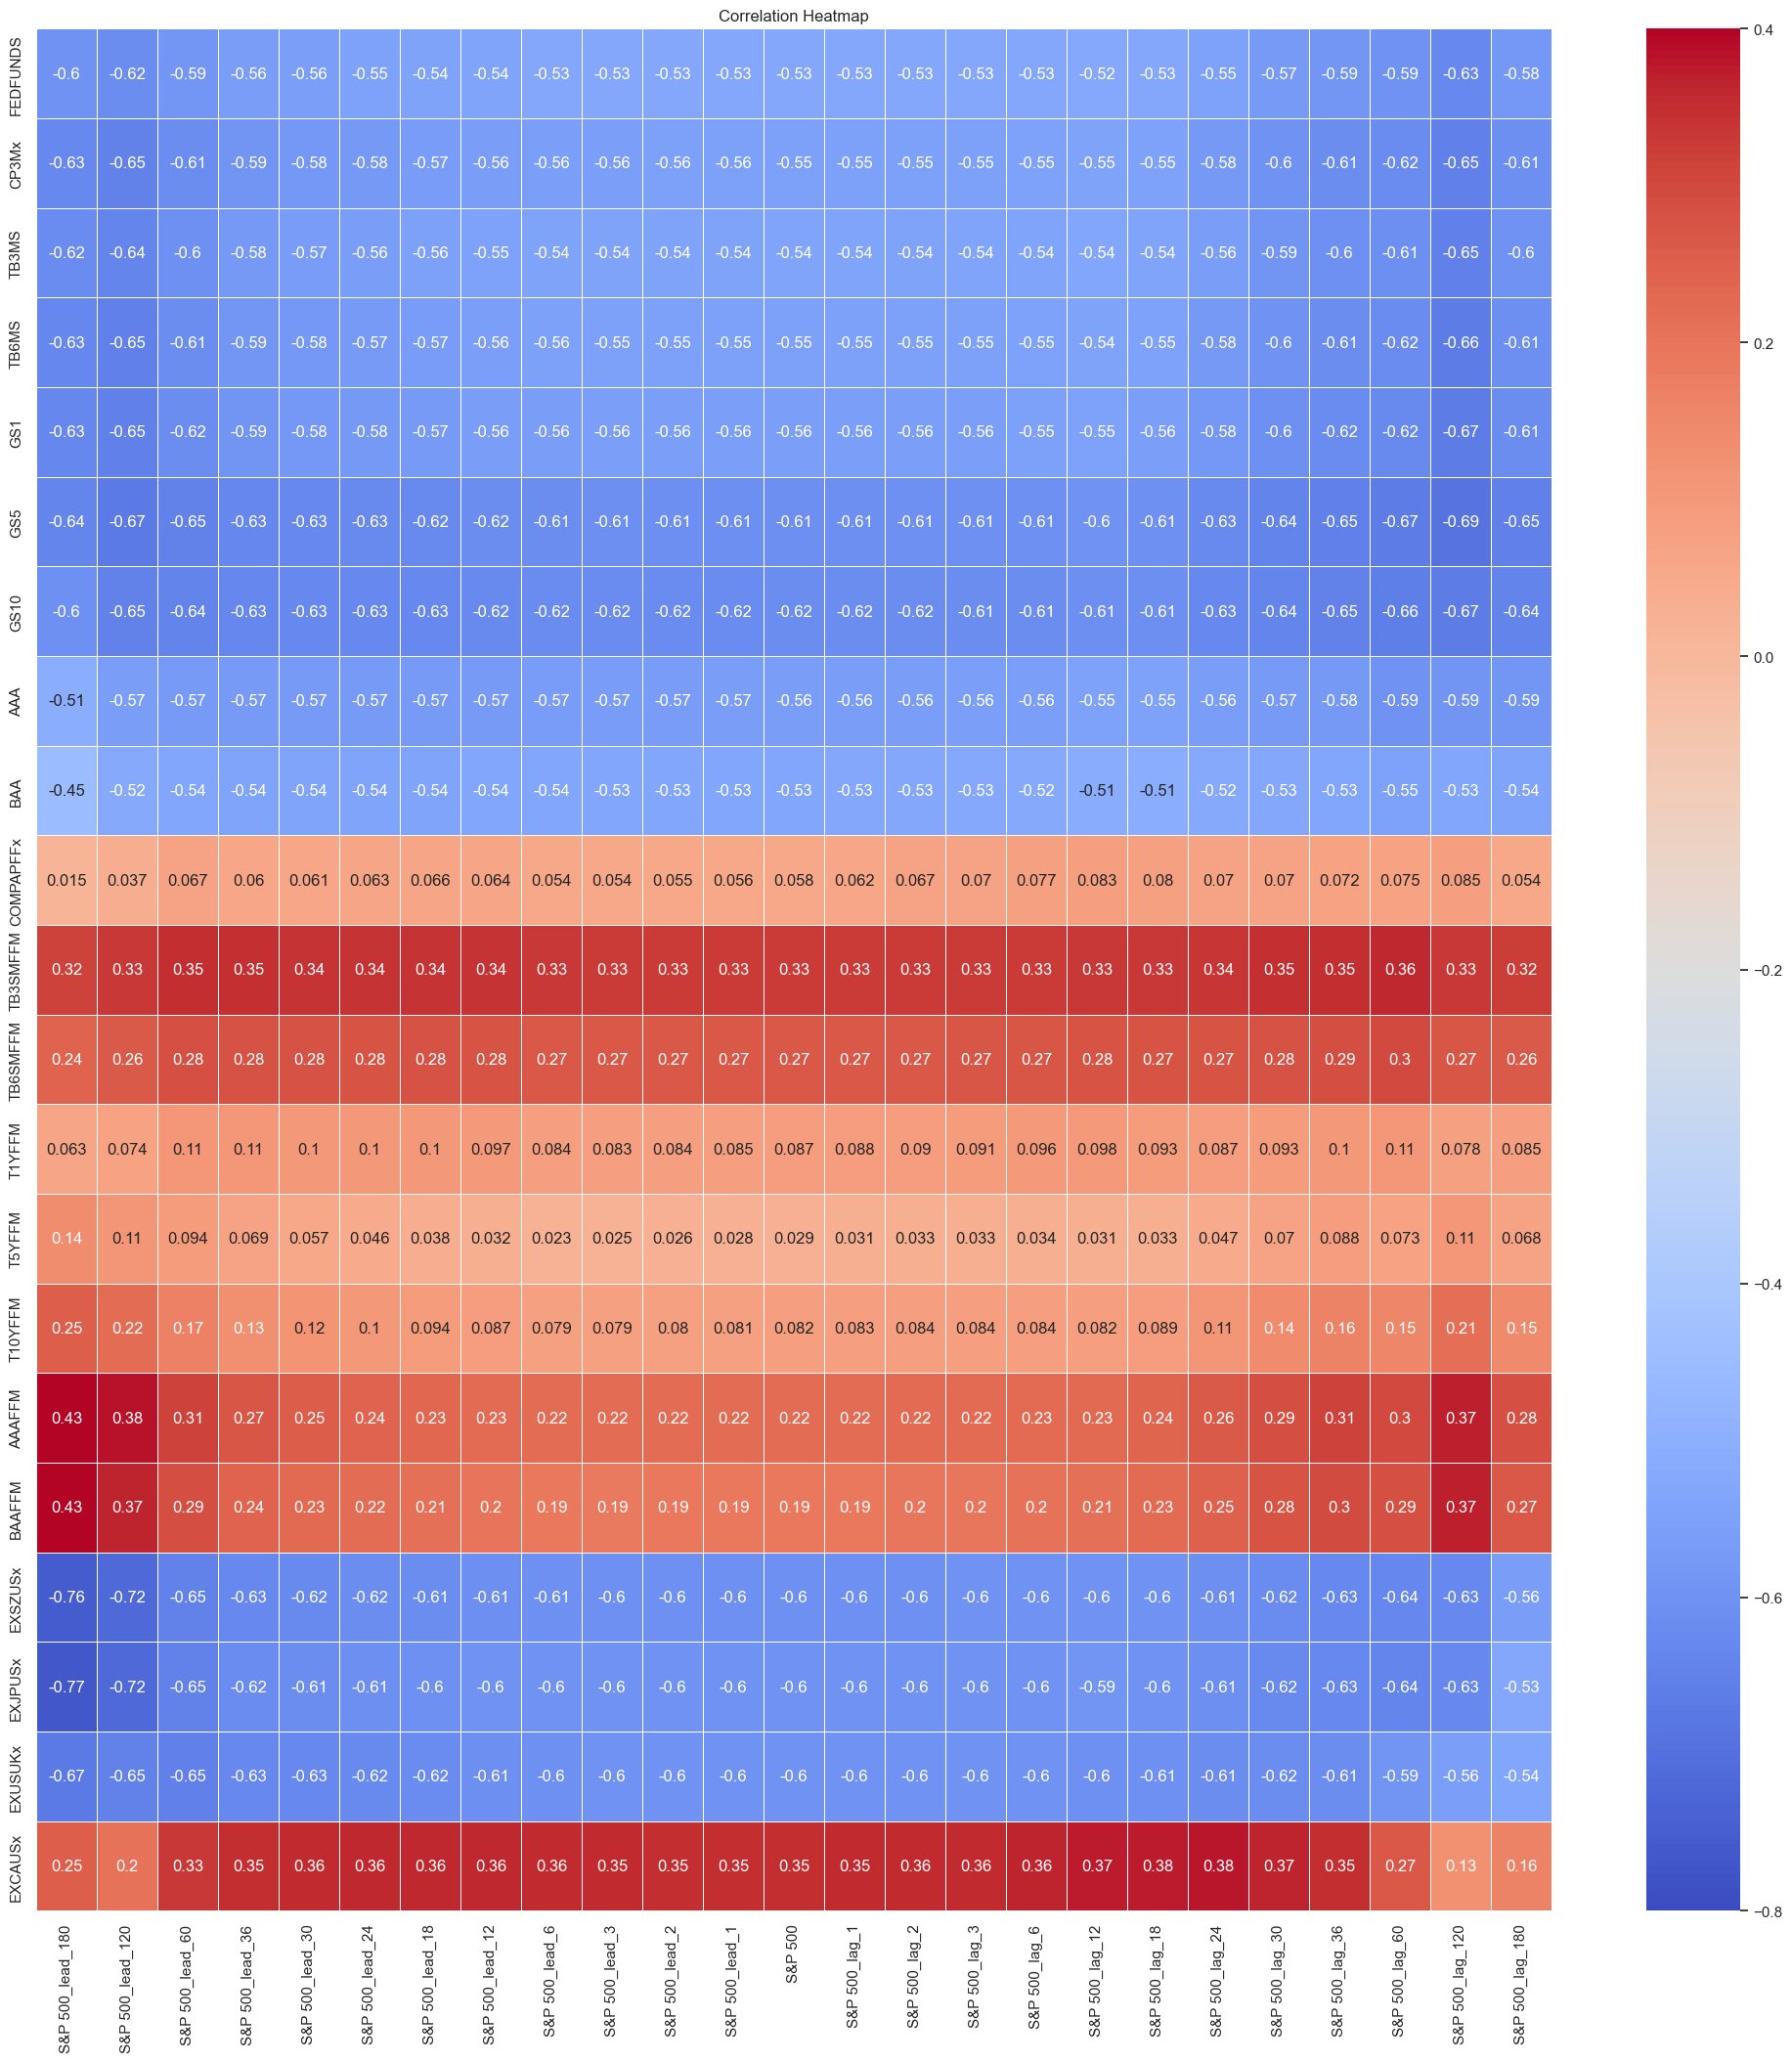

In [186]:
corr_2matrix(group5, sp_500_lag_lead,-0.8,0.4)

### 4.2 Patterns observed from Group 5 and S&P500 correlation
(Used S&P 500 to represent group 8)

Moody's AAA/BAA corporate bond yields seems to be leading the stock market. The correlation increases with increasing lead time. The correlation is not very high (This can also be because of the use of fill_na attribut, we can check the correlation by using drop_na instead)

### 5.1 Correlation of Group 6 and Group 8

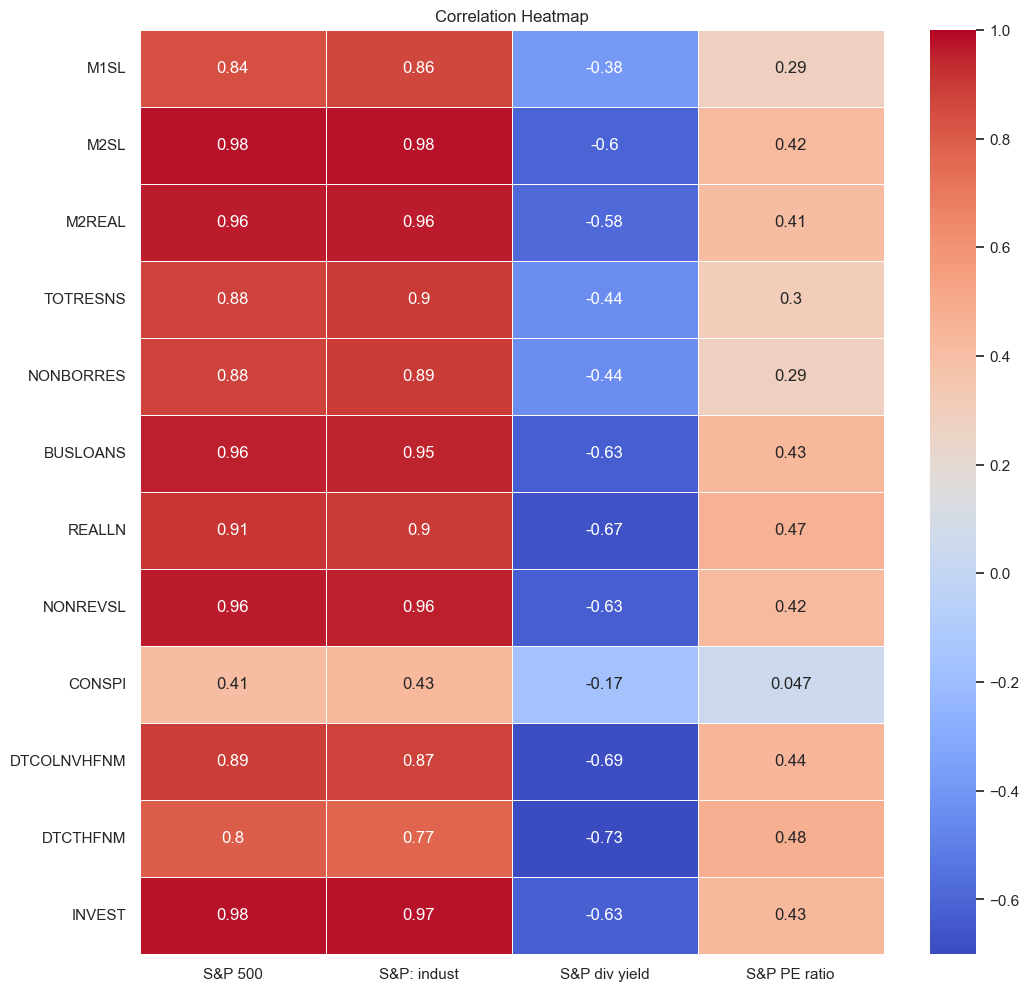

In [187]:
corr_2matrix(group6, group8,-0.7,1)

### 5.1 Analysis

•	All variables show positive interest with stock market and negative correlation with div yields. This is because increasing money and credit supply causes easier financing stimulating higher profits for companies and stock prices. Supply/credit increases when interest rates are low and during low interest environment, dividends yield decline as explained in 4.1 analysis


### 5.2 Correlation between Group 6 and Group 8 (Lead/lag)

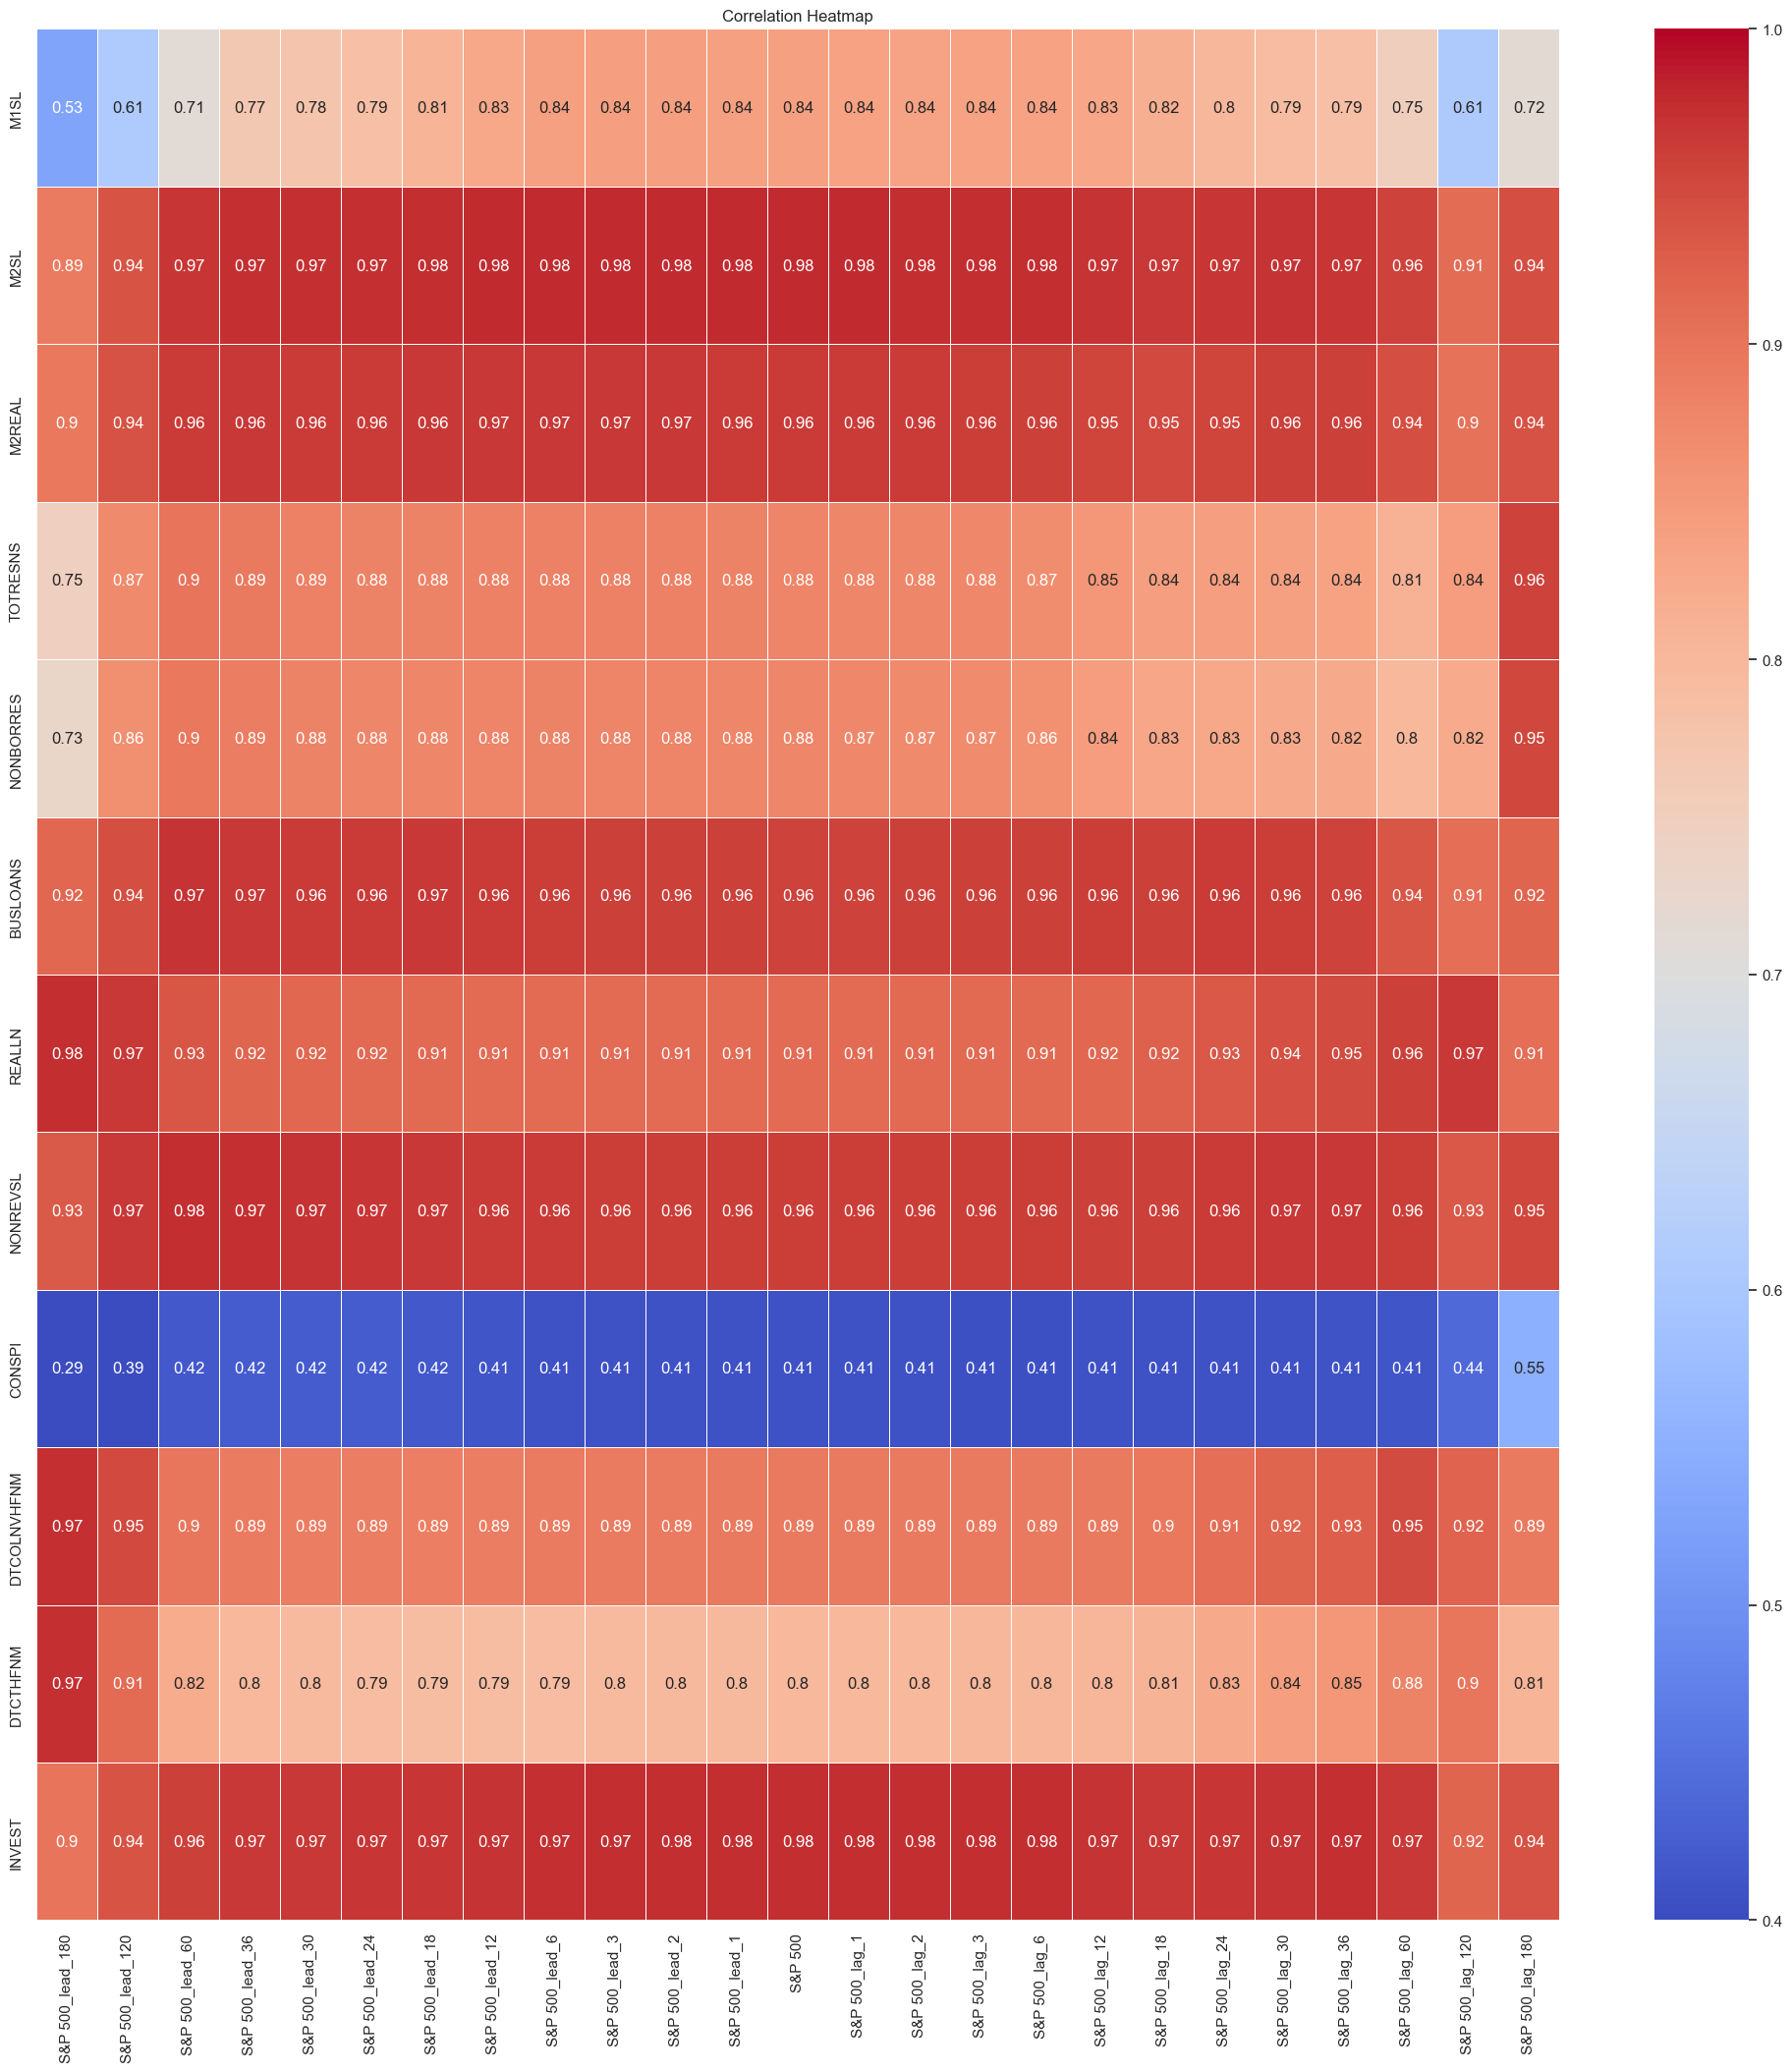

In [188]:
corr_2matrix(group6, sp_500_lag_lead,0.4,1)

### 5.2 Patterns observed from Group 6 and S&P500 correlation
(Used S&P 500 to represent group 8)

•	Correlation with loans is high for a leading period which aligns with loan term periods

•	Similar trend is observed for loan outstandings
